# **PARTE 1:** Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

## **Carga y Vista General:**

#### CARGA DE PAQUETES Y DATOS

In [6]:
import os
import numpy as np
import pandas as pd
import sqlalchemy as sa
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy = True

# Transformación de variables
from sklearn.preprocessing import OrdinalEncoder

# Normalización de variables
from sklearn.preprocessing import PowerTransformer

# Preselección de variables
from sklearn.feature_selection import mutual_info_regression 
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

# Test y validación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Modelización
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Pipelines
from sklearn.pipeline import Pipeline

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

#Formato sin notación científica
pd.options.display.float_format = '{:15.2f}'.format 

#Automcompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

#Mostrar el máximo de filas posibles de una tabla
pd.set_option('display.max_rows', 100) #Número de filas que deben verse. None = Máx

#Mostrar el máximo de columnas posibles de una tabla
pd.set_option('display.max_columns', None) #Número de columnas que deben verse. None = Máx

#Mostrar mas caracteres de las columnas. Se usa cuando se corta el texto
pd.set_option('display.max_colwidth', None) #Número de caractres que deben verse. None = Máx


In [7]:
#Cargamos los datos desde github para que sea ejecutable desde cualquier equipo
url = 'https://raw.githubusercontent.com/OscarFraile/EVOLVE/refs/heads/main/Raul_Navas_Estadistica/Proyecto_estadistica/Madrid_Sale.csv'
df = pd.read_csv(url)

#### ESTRUCTURA Y TIPOS

In [8]:
# Extraemos las primeras filas del dataset
df.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
0,A15019136831406238029,201803,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36
1,A6677225905472065344,201803,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42
2,A13341979748618524775,201803,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42
3,A4775182175615276542,201803,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42
4,A2492087730711701973,201803,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41


In [9]:
# Información sobre df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        94815 non-null  object 
 1   PERIOD                         94815 non-null  int64  
 2   PRICE                          94815 non-null  float64
 3   UNITPRICE                      94815 non-null  float64
 4   CONSTRUCTEDAREA                94815 non-null  int64  
 5   ROOMNUMBER                     94815 non-null  int64  
 6   BATHNUMBER                     94815 non-null  int64  
 7   HASTERRACE                     94815 non-null  int64  
 8   HASLIFT                        94815 non-null  int64  
 9   HASAIRCONDITIONING             94815 non-null  int64  
 10  AMENITYID                      94815 non-null  int64  
 11  HASPARKINGSPACE                94815 non-null  int64  
 12  ISPARKINGSPACEINCLUDEDINPRICE  94815 non-null 

In [10]:
# Identificamos los tipos de variables para incorporarlos a la descripción
df.dtypes

ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN                          int64
ISDUPLEX                           int64
ISSTUDIO        

In [11]:
# Visualizamos las dimensiones del data set
df.shape

(94815, 41)

In [12]:
# Buscamos columnas que sean constantes pero vemos que no hay ninguna
df.nunique().sort_values(ascending=True)

HASTERRACE                           2
HASPARKINGSPACE                      2
HASNORTHORIENTATION                  2
HASSOUTHORIENTATION                  2
ISPARKINGSPACEINCLUDEDINPRICE        2
HASLIFT                              2
HASAIRCONDITIONING                   2
ISSTUDIO                             2
ISDUPLEX                             2
HASGARDEN                            2
HASDOORMAN                           2
HASSWIMMINGPOOL                      2
HASWARDROBE                          2
HASBOXROOM                           2
HASWESTORIENTATION                   2
HASEASTORIENTATION                   2
FLATLOCATIONID                       2
ISINTOPFLOOR                         2
BUILTTYPEID_2                        2
BUILTTYPEID_1                        2
BUILTTYPEID_3                        2
AMENITYID                            3
PERIOD                               4
CADASTRALQUALITYID                  10
FLOORCLEAN                          13
BATHNUMBER               

#### DUPLICADOS

##### ASSETID

In [13]:
# Entendemos que tiene sentido hacer índice la columna ASSETID pero observamos que hay valores repetidos. Estos valores
# existen porque se han hecho publicado diferentes anuncios con variaciones de precio del inmueble en el mismo periodo
# de tiempo, por lo que aparece como un nuevo registro, por lo que hay 94815 registros y 75804 ASSETID
df.nunique().sort_values(ascending=False)

LONGITUDE                        94713
DISTANCE_TO_CITY_CENTER          94713
LATITUDE                         94713
DISTANCE_TO_CASTELLANA           94707
DISTANCE_TO_METRO                94445
ASSETID                          75804
UNITPRICE                        31151
PRICE                             2761
CONSTRUCTEDAREA                    558
CADDWELLINGCOUNT                   329
CONSTRUCTIONYEAR                   191
CADCONSTRUCTIONYEAR                168
PARKINGSPACEPRICE                  146
CADMAXBUILDINGFLOOR                 26
ROOMNUMBER                          21
BATHNUMBER                          18
FLOORCLEAN                          13
CADASTRALQUALITYID                  10
PERIOD                               4
AMENITYID                            3
HASTERRACE                           2
HASLIFT                              2
ISPARKINGSPACEINCLUDEDINPRICE        2
HASPARKINGSPACE                      2
HASAIRCONDITIONING                   2
ISSTUDIO                 

In [14]:
# Observamos que hay inmuebles que se han publicado en varias ocasiones, por lo que vamos a eliminar los duplicados y a
# quedarnos con el primero que aparezca en el dataset
counts = df['ASSETID'].value_counts()
repetidos = counts[counts > 1]
print(repetidos)

ASSETID
A5463639993615125363     11
A2282202115281541721      9
A14882068007191593522     9
A1315840462730187222      8
A5953256861383778054      7
                         ..
A13498463812841109246     2
A11434762754560207282     2
A245971519647496657       2
A13123848576498470228     2
A17082387963892631769     2
Name: count, Length: 13829, dtype: int64


In [15]:
# Extraemos una tabla con los duplicados para confirmar las discrepancias
duplicados = df[df.duplicated(subset='ASSETID', keep='first')]
duplicados.sort_values('ASSETID')

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
66878,A10001362419935476012,201803,215000.00,7678.57,28,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,6.00,1.00,1890,6,13,3.00,0,0,1,0.27,0.32,1.08,-3.71,40.42
21455,A10001362419935476012,201803,210000.00,7500.00,28,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,6.00,1.00,1890,6,13,3.00,0,0,1,0.34,0.26,1.16,-3.71,40.42
87448,A10001425521130099891,201812,387000.00,2976.92,130,4,2,1,1,0,3,1,1,1,0,0,1,1,0,1,1,0,1,0,0,0,NaN,2.00,1.00,1991,7,87,4.00,0,0,1,6.52,0.55,5.31,-3.63,40.42
91162,A10001980858746879564,201803,270000.00,2700.00,100,3,2,0,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,NaN,1.00,1.00,2005,7,203,4.00,0,0,1,9.17,0.18,8.03,-3.60,40.40
33347,A10001980858746879564,201803,271000.00,2710.00,100,3,2,0,1,1,3,1,1,1,0,1,1,0,1,1,1,0,1,0,0,0,NaN,1.00,1.00,2005,7,203,4.00,0,0,1,9.18,0.16,8.05,-3.60,40.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41334,A9995962414057013729,201812,677000.00,6044.64,112,1,1,0,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1.00,1.00,1967,5,18,6.00,1,0,0,0.69,0.19,0.47,-3.70,40.42
20572,A9995962414057013729,201812,664000.00,5928.57,112,1,1,0,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1.00,1.00,1967,5,18,6.00,1,0,0,0.75,0.10,0.50,-3.70,40.42
37580,A9998114233912501493,201812,856000.00,7193.28,119,2,2,0,1,1,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,2.00,1.00,1944,3,3,3.00,0,0,1,0.15,0.29,0.69,-3.70,40.42
91094,A9998712247880672923,201812,805000.00,4908.54,164,2,2,0,0,1,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1880.00,3.00,1.00,1880,4,10,4.00,0,0,1,0.59,0.18,0.35,-3.70,40.41


In [16]:
# Eliminamos los duplicados y nos quedamos con el primero que aparezca en el dataset
df = df.drop_duplicates(subset='ASSETID', keep='first')
df

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
0,A15019136831406238029,201803,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36
1,A6677225905472065344,201803,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42
2,A13341979748618524775,201803,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42
3,A4775182175615276542,201803,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42
4,A2492087730711701973,201803,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94620,A571333680340351890,201812,152000.00,2000.00,76,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1972.00,2.00,NaN,1972,4,9,6.00,0,0,1,8.58,0.84,6.90,-3.61,40.44
94621,A8743337170237196617,201812,242000.00,2200.00,110,4,2,0,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1987.00,1.00,1.00,1987,7,22,5.00,0,0,1,8.59,0.71,6.95,-3.61,40.44
94730,A17390996892963923855,201812,107000.00,4280.00,25,1,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1930.00,0.00,NaN,1930,6,33,4.00,0,0,1,3.03,0.29,1.03,-3.70,40.44
94750,A594657524104116520,201812,145000.00,1883.12,77,2,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1965.00,1.00,1.00,1965,4,5,5.00,0,1,0,4.30,0.11,3.84,-3.74,40.39


#### VARIABLES DE TIEMPO

##### PERIOD

In [17]:
# Observamos que en la columna PERIOD solamente hay 4 valores que corresponden a las mediciones que se han
# hecho trimestralmente de los precios. Vamos a transformar esta columna en un datetime para poder trabajar con ella
df['PERIOD'].unique()

array([201803, 201809, 201812, 201806])

In [18]:
# Hacemos datetime la columna PERIOD 
df['PERIOD'] = pd.to_datetime(df['PERIOD'].astype(str), format='%Y%m')

# Establecemos PERIOD como índice para usar sus propiedades
#df = df.reset_index()
df = df.set_index('PERIOD')

def componentes_fecha(dataframe):
    # Convertimos el índice a datetime para poder extraer los componentes
    fecha_index = pd.to_datetime(dataframe.index.astype(str), format='%Y-%m-%d')
    
    año = fecha_index.year
    mes = fecha_index.month
    dia = fecha_index.day
    
    return pd.DataFrame({'MES_2018': mes}, index=dataframe.index)

# Como PERIOD ya es el índice, concatenamos directamente y volvemos a establecer ASSETID como índice
df = pd.concat([df, componentes_fecha(df)], axis=1).set_index('ASSETID')

#Reorganizamos el dataset para volver a tener la columna referente a la fecha al principio
#Sacamos una lista de todas las columnas
list(df.columns)

#Extraemos las columnas que queremos modificar y las ponemos en el orden que queremos que aparezcan
reorden = ['MES_2018']

#Hacemos una lista con el resto de columnas 
resto = df.drop(columns = reorden).columns.to_list()
resto

#Agregamos ambas listas
orden = reorden + resto
df = df[orden]
df

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A15019136831406238029,3,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36
A6677225905472065344,3,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42
A13341979748618524775,3,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42
A4775182175615276542,3,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42
A2492087730711701973,3,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A571333680340351890,12,152000.00,2000.00,76,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1972.00,2.00,NaN,1972,4,9,6.00,0,0,1,8.58,0.84,6.90,-3.61,40.44
A8743337170237196617,12,242000.00,2200.00,110,4,2,0,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1987.00,1.00,1.00,1987,7,22,5.00,0,0,1,8.59,0.71,6.95,-3.61,40.44
A17390996892963923855,12,107000.00,4280.00,25,1,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1930.00,0.00,NaN,1930,6,33,4.00,0,0,1,3.03,0.29,1.03,-3.70,40.44


#### NULOS

##### VARIABLES:
- CONSTRUCTIONYEAR
- FLATLOCATIONID
- FLOORCLEAN

In [19]:
# Identificamos los nulos 
df.isna().sum().sort_values(ascending = False)

CONSTRUCTIONYEAR                 45574
FLATLOCATIONID                    5162
FLOORCLEAN                        3114
CADASTRALQUALITYID                   1
MES_2018                             0
PRICE                                0
UNITPRICE                            0
CONSTRUCTEDAREA                      0
HASLIFT                              0
HASTERRACE                           0
BATHNUMBER                           0
ROOMNUMBER                           0
HASAIRCONDITIONING                   0
AMENITYID                            0
HASPARKINGSPACE                      0
ISPARKINGSPACEINCLUDEDINPRICE        0
HASWESTORIENTATION                   0
HASBOXROOM                           0
HASWARDROBE                          0
HASSWIMMINGPOOL                      0
PARKINGSPACEPRICE                    0
HASNORTHORIENTATION                  0
HASSOUTHORIENTATION                  0
HASEASTORIENTATION                   0
ISSTUDIO                             0
ISDUPLEX                 

##### CONSTRUCTIONYEAR

Vamos a realizar dos acciones sobre esta variable.
- Vamos a generar una columna binaria para identificar los registros informados y los que no lo están
- Vamos a realizar una imputación de los 45574 registros según la distribución que tienen los datos y después vamos a agruparlos de 20 en 20 años para poder clasificarlos y que ayuden a nuestro modelo y de esta forma no tendremos que hacer tratamiento de atípicos que hemos detectado

In [20]:
df.CONSTRUCTIONYEAR.value_counts(ascending=False, dropna=False)

CONSTRUCTIONYEAR
NaN        45574
1960.00     1864
1970.00     1646
1965.00     1462
1900.00     1284
           ...  
1655.00        1
350.00         1
1067.00        1
49.00          1
225.00         1
Name: count, Length: 191, dtype: int64

In [21]:
df.loc[df.CONSTRUCTIONYEAR < 1800].CONSTRUCTIONYEAR.value_counts().sort_index()

CONSTRUCTIONYEAR
1.00       1
7.00       1
19.00      2
48.00      1
49.00      1
50.00      2
54.00      1
160.00     1
173.00     1
190.00     1
195.00     1
198.00     3
225.00     1
350.00     1
1056.00    1
1067.00    1
1070.00    1
1073.00    1
1197.00    1
1623.00    2
1627.00    1
1655.00    1
1692.00    1
1696.00    1
1700.00    1
1723.00    1
1730.00    1
1780.00    1
Name: count, dtype: int64

In [22]:
def crear_columna_imputacion(dataframe, columna):
    """
    Crea la columna CONSTRUCTIONYEAR_IMPUT:
    1 = Dato informado originalmente
    0 = Dato nulo (NaN)
    """
    nombre_nueva_col = f"{columna}_IMPUT"
    
    # .notna() nos dará True si el registro está informado, False si es NaN
    # .astype(int) lo convierte en 1 y 0 respectivamente
    df[nombre_nueva_col] = df[columna].notna().astype(int)
    
    return dataframe

df = crear_columna_imputacion(df, 'CONSTRUCTIONYEAR')
df

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A15019136831406238029,3,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36,1
A6677225905472065344,3,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42,0
A13341979748618524775,3,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42,0
A4775182175615276542,3,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42,0
A2492087730711701973,3,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A571333680340351890,12,152000.00,2000.00,76,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1972.00,2.00,NaN,1972,4,9,6.00,0,0,1,8.58,0.84,6.90,-3.61,40.44,1
A8743337170237196617,12,242000.00,2200.00,110,4,2,0,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1987.00,1.00,1.00,1987,7,22,5.00,0,0,1,8.59,0.71,6.95,-3.61,40.44,1
A17390996892963923855,12,107000.00,4280.00,25,1,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1930.00,0.00,NaN,1930,6,33,4.00,0,0,1,3.03,0.29,1.03,-3.70,40.44,1


In [23]:
# 1. Definimos los años conocidos (solo los que están entre 1800 y 2018 para evitar ruido)
años_validos = df.loc[(df['CONSTRUCTIONYEAR_IMPUT'] == 1) & 
                      (df['CONSTRUCTIONYEAR'] >= 1800) & 
                      (df['CONSTRUCTIONYEAR'] <= 2018), 'CONSTRUCTIONYEAR']

# 2. Identificamos dónde están los nulos
mascara_nulos = df['CONSTRUCTIONYEAR'].isna()

# 3. Generamos una muestra aleatoria de los años válidos para rellenar los nulos
relleno = np.random.choice(años_validos, size=mascara_nulos.sum())

# 4. Aplicamos el relleno
df.loc[mascara_nulos, 'CONSTRUCTIONYEAR'] = relleno

# Convertimos a entero para limpiar los decimales .0
df['CONSTRUCTIONYEAR'] = df['CONSTRUCTIONYEAR'].astype(int)

In [24]:
# Definimos los cortes de 20 en 20 años empezando desde 1800
# El rango llegará hasta 2020 para cubrir los anuncios de 2018
bins = list(range(1800, 2021, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]

# Creamos la nueva columna categórica
df['CONSTRUCTION_PERIOD'] = pd.cut(df['CONSTRUCTIONYEAR'], 
                                   bins=bins, 
                                   labels=labels, 
                                   right=False)

# Los años que queden por debajo de 1800 (si no los limpiaste) aparecerán como NaN, 
# podemos agruparlos en "Anterior a 1800"
df['CONSTRUCTION_PERIOD'] = df['CONSTRUCTION_PERIOD'].astype(object).fillna('<1800')

In [25]:
df.CONSTRUCTION_PERIOD.value_counts().sort_index()

CONSTRUCTION_PERIOD
1800-1819       17
1820-1839       15
1840-1859       89
1860-1879      232
1880-1899     1095
1900-1919     5184
1920-1939     5653
1940-1959    10349
1960-1979    30208
1980-1999    10505
2000-2019    12411
<1800           46
Name: count, dtype: int64

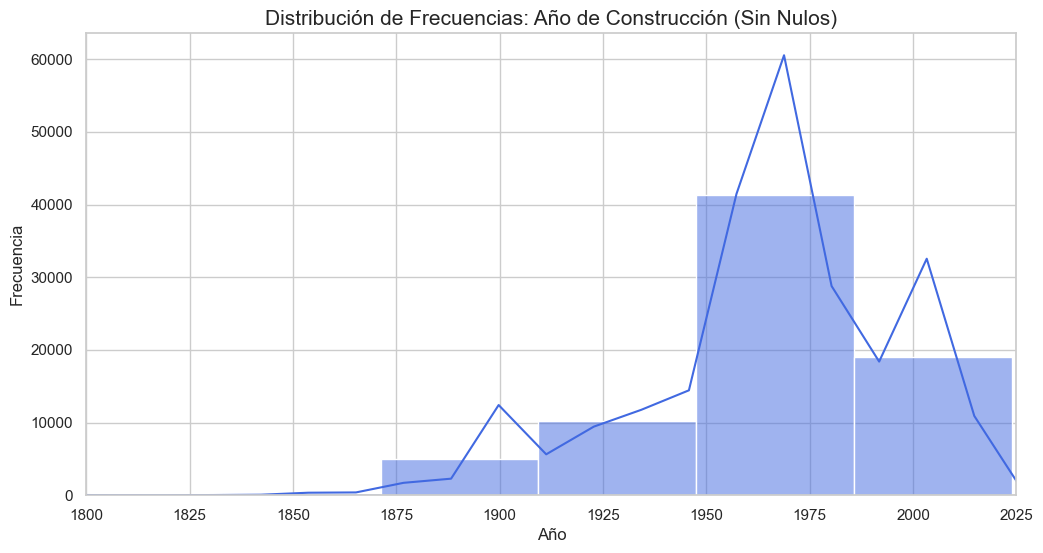

In [26]:
# Vamos a hacer un gráfico de como era la distribución de los datos de CONSTRUCTIONYEAR antes de hacer la imputación
url = 'https://raw.githubusercontent.com/OscarFraile/EVOLVE/refs/heads/main/Raul_Navas_Estadistica/Proyecto_estadistica/Madrid_Sale.csv'
df1 = pd.read_csv(url)

# 1. Filtramos el dataframe para ignorar los nulos en esa columna
df_filtrado = df[df['CONSTRUCTIONYEAR'].notna()]

# 2. Configuramos el estilo
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# 3. Creamos el histograma con los datos filtrados
# Usamos bins=60 para captar bien los picos de construcción
sns.histplot(df_filtrado['CONSTRUCTIONYEAR'], kde=True, color='royalblue', bins=60)

# 4. Ajustes de ejes y títulos
plt.title('Distribución de Frecuencias: Año de Construcción (Sin Nulos)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Limitamos el rango para que sea legible (de 1800 en adelante)
plt.xlim(1800, 2025)

plt.show()

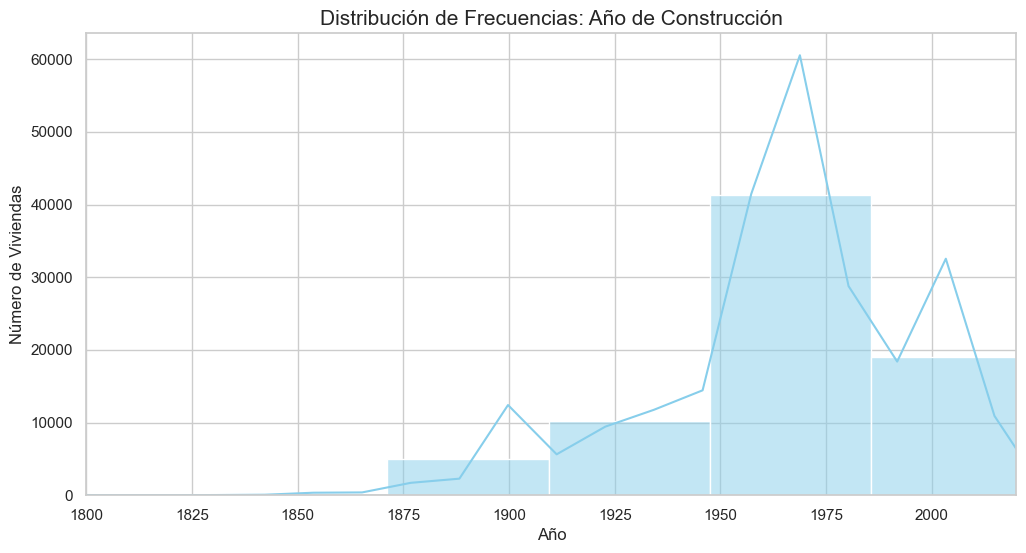

In [27]:
# Hacemos una visualización de la distribución de los datos después de hacer las imputaciones por valores aleatorios
# y comprobamos que siguen una distribución similar, por lo que podemos seguir trabajando con ellos
#  Configuramos el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creamos el histograma
# bins=50 para ver detalle, o puedes usar bins=list(range(1800, 2025, 5))
plot = sns.histplot(df['CONSTRUCTIONYEAR'], kde=True, color='skyblue', bins=60)

# Añadimos títulos y etiquetas
plt.title('Distribución de Frecuencias: Año de Construcción', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Viviendas', fontsize=12)

# Limitamos el eje X para evitar que los errores (años 1, 7, etc.) deformen la gráfica
# Solo mostramos desde 1800 hasta la actualidad
plt.xlim(1800, 2020)

plt.show()

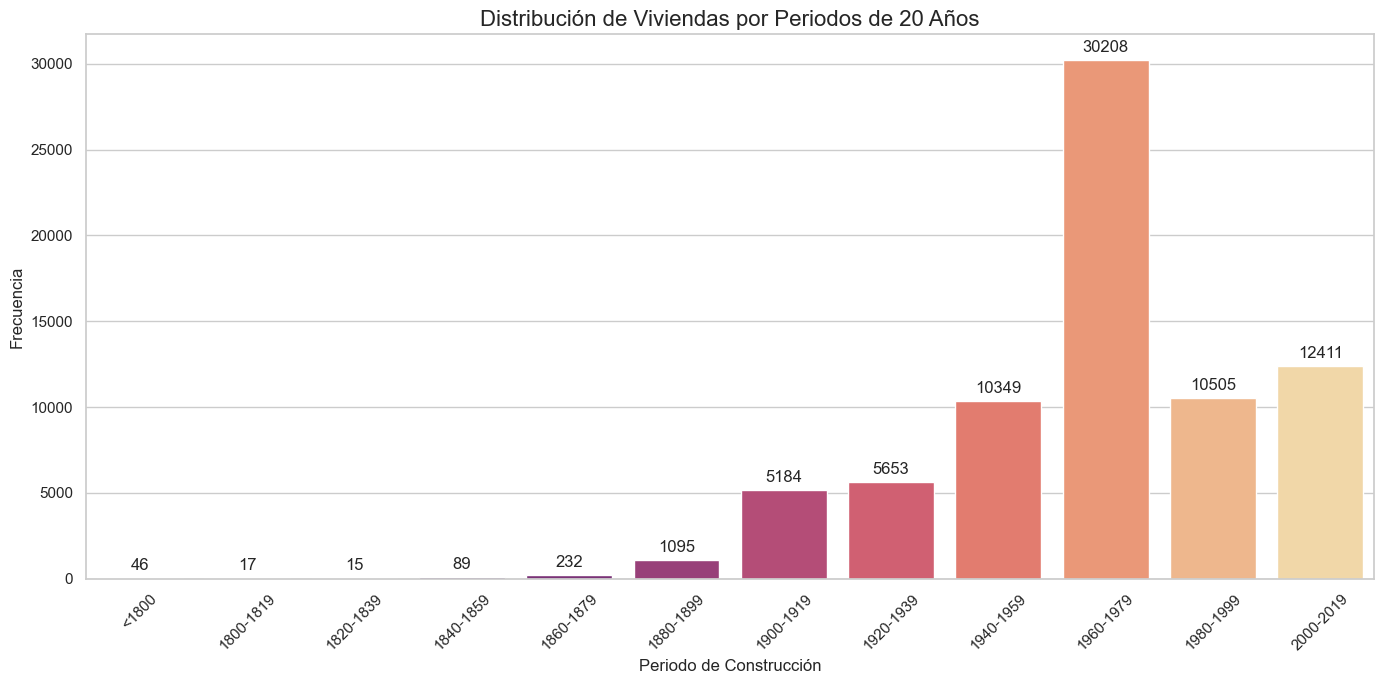

In [28]:
# Visualizamos los datos de la columna CONSTRUCTIONYEAR_PERIOD 

# 1. Preparar los datos (aseguramos el orden cronológico para la gráfica)
orden_periodos = [
    '<1800', '1800-1819', '1820-1839', '1840-1859', '1860-1879', 
    '1880-1899', '1900-1919', '1920-1939', '1940-1959', '1960-1979', 
    '1980-1999', '2000-2019'
]

# 2. Configurar el estilo
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# 3. Crear el gráfico de barras
# Usamos order=orden_periodos para que no se desordenen alfabéticamente
barplot = sns.countplot(
    data=df, 
    x='CONSTRUCTION_PERIOD', 
    palette='magma', 
    order=orden_periodos
)

# 4. Añadir etiquetas de cantidad sobre cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# 5. Títulos y ajustes
plt.title('Distribución de Viviendas por Periodos de 20 Años', fontsize=16)
plt.xlabel('Periodo de Construcción', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [29]:
df.isna().sum().sort_values(ascending=False)

FLATLOCATIONID                   5162
FLOORCLEAN                       3114
CADASTRALQUALITYID                  1
UNITPRICE                           0
ROOMNUMBER                          0
BATHNUMBER                          0
HASTERRACE                          0
CONSTRUCTEDAREA                     0
MES_2018                            0
PRICE                               0
AMENITYID                           0
HASAIRCONDITIONING                  0
HASLIFT                             0
HASPARKINGSPACE                     0
HASSOUTHORIENTATION                 0
ISPARKINGSPACEINCLUDEDINPRICE       0
PARKINGSPACEPRICE                   0
HASNORTHORIENTATION                 0
HASWARDROBE                         0
HASSWIMMINGPOOL                     0
HASDOORMAN                          0
HASGARDEN                           0
ISDUPLEX                            0
HASEASTORIENTATION                  0
HASWESTORIENTATION                  0
HASBOXROOM                          0
CONSTRUCTION

##### FLATLOCATIONID

Observamos nulos y los vamos a imputar por una categoría 3.0 para tenerlos identificados

In [30]:
df.FLATLOCATIONID.value_counts(dropna=False).sort_index()

FLATLOCATIONID
1.00    60912
2.00     9730
NaN      5162
Name: count, dtype: int64

In [31]:
df['FLATLOCATIONID'] = df['FLATLOCATIONID'].fillna(3.0)
df.FLATLOCATIONID.value_counts(dropna=False).sort_index()

FLATLOCATIONID
1.00    60912
2.00     9730
3.00     5162
Name: count, dtype: int64

##### FLOORCLEAN

Imputamos los nulos por valores aleatorios siguiendo la distribución de los registros identificados

In [32]:
df.FLOORCLEAN.value_counts(dropna=False).sort_index()

FLOORCLEAN
-1.00      751
0.00      8129
1.00     16193
2.00     13583
3.00     11797
4.00      9391
5.00      4904
6.00      2989
7.00      1938
8.00      1185
9.00       647
10.00      352
11.00      831
NaN       3114
Name: count, dtype: int64

In [33]:
# Hacemos una imputación aleatoria de los nulos de la variable FLOORCLEAN

# 1. Columna de control
df['FLOORCLEAN_IMPUT'] = df['FLOORCLEAN'].notna().astype(int)

# 2. Valores disponibles para copiar la distribución
plantas_validas = df['FLOORCLEAN'].dropna()

# 3. Rellenar nulos con valores enteros de la distribución
mask_nulos = df['FLOORCLEAN'].isna()
df.loc[mask_nulos, 'FLOORCLEAN'] = np.random.choice(plantas_validas, size=mask_nulos.sum())

# 4. Asegurar tipo entero
df['FLOORCLEAN'] = df['FLOORCLEAN'].astype(int)

df.FLOORCLEAN.value_counts(dropna=False).sort_index()

FLOORCLEAN
-1       781
 0      8462
 1     16902
 2     14162
 3     12298
 4      9790
 5      5110
 6      3132
 7      2034
 8      1232
 9       665
 10      361
 11      875
Name: count, dtype: int64

## **Clasificación de Variables:**

### Dataset de viviendas en Madrid (Idealista 2018)

Este dataset recoge información detallada y georreferenciada sobre anuncios inmobiliarios en Madrid en 2018, extraída de Idealista. Incluye más de **180.000 viviendas** (Madrid, Barcelona y Valencia, aunque aquí nos centramos en Madrid), con datos de precios, características del inmueble y variables espaciales relevantes para estudios urbanos y análisis del mercado inmobiliario.

Los datos fueron anonimizados y son especialmente útiles para:

- Modelos de precios  
- Análisis urbano  
- Estudios de accesibilidad y localización  
- Ciencia de datos aplicada al real estate  

---

#### Descripción de las columnas

De cara a ahorrar espacio, voy a hacer una descripción de cada variable y voy a añadir la información de los tipos de variables que son cada una en el momento de la carga del dataset original. Mas tarde se harán las modificaciones y se explicarán de manera individual

##### Identificación y tiempo
- **ASSETID**: Identificador único de cada vivienda. Nominal // object
- **PERIOD**: Periodo temporal del anuncio en formato `YYYYMM`. Ordinal // int

##### Precio y superficie
- **PRICE**: Precio total del inmueble (€). Continua // float
- **UNITPRICE**: Precio por metro cuadrado (€ / m²). Continua // float
- **CONSTRUCTEDAREA**: Superficie construida en metros cuadrados. Continua // int

##### Distribución
- **ROOMNUMBER**: Número total de habitaciones. Discreta // int
- **BATHNUMBER**: Número de baños. Discreta // int

##### Características del inmueble (binarias: 1 = sí, 0 = no)
- **HASTERRACE**: Tiene terraza. Nominal // int
- **HASLIFT**: Tiene ascensor. Nominal // int
- **HASAIRCONDITIONING**: Tiene aire acondicionado. Nominal // int
- **HASPARKINGSPACE**: Incluye plaza de parking. Nominal // int
- **ISPARKINGSPACEINCLUDEDINPRICE**: El parking está incluido en el precio. Nominal // int
- **HASNORTHORIENTATION**: Orientación norte. Nominal // int
- **HASSOUTHORIENTATION**: Orientación sur. Nominal // int
- **HASEASTORIENTATION**: Orientación este. Nominal // int
- **HASWESTORIENTATION**: Orientación oeste. Nominal // int
- **HASBOXROOM**: Tiene trastero. Nominal // int
- **HASWARDROBE**: Tiene armarios empotrados. Nominal // int
- **HASSWIMMINGPOOL**: Tiene piscina. Nominal // int
- **HASDOORMAN**: Tiene portero o conserje. Nominal // int
- **HASGARDEN**: Tiene jardín. Nominal // int
- **ISDUPLEX**: Es un dúplex. Nominal // int
- **ISSTUDIO**: Es un estudio. Nominal // int
- **ISINTOPFLOOR**: Está en la última planta. Nominal // int

##### Parking
- **PARKINGSPACEPRICE**: Precio de la plaza de parking. Continua // int

##### Año y planta
- **CONSTRUCTIONYEAR**: Año de construcción (puede contener NA). Discreta // float
- **FLOORCLEAN**: Planta del inmueble. Discreta // float
- **FLATLOCATIONID**: Código interno de localización del piso. Nominal // float

##### Información catastral
- **CADCONSTRUCTIONYEAR**: Año de construcción según catastro. Discreta // int
- **CADMAXBUILDINGFLOOR**: Número máximo de plantas del edificio. Discreta // int
- **CADDWELLINGCOUNT**: Número de viviendas en el edificio. Discreta // int
- **CADASTRALQUALITYID**: Clasificación de calidad catastral del inmueble. Ordinal // float

##### Tipo de vivienda
- **BUILTTYPEID_1**: Obra nueva. Nominal // int
- **BUILTTYPEID_2**: Segunda mano para reformar. Nominal // int
- **BUILTTYPEID_3**: Segunda mano en buen estado. Nominal // int

##### Variables espaciales
- **DISTANCE_TO_CITY_CENTER**: Distancia al centro de la ciudad (km). Continua // float
- **DISTANCE_TO_METRO**: Distancia a la estación de metro más cercana (km). Continua // float
- **DISTANCE_TO_MAIN_AVENUE**: Distancia al Paseo de la Castellana (km). Continua // float

##### Geolocalización
- **LONGITUDE**: Longitud geográfica. Continua // float
- **LATITUDE**: Latitud geográfica. Continua // float

##### Otros
- **AMENITYID**: Código de amenities asociados al inmueble. Nominal // int

## **Detección de Outliers:**

Debemos trabajar sobre las siguientes variables. Los motivos se explicarán en cada caso y las interpretaciones en el siguiente apartado
- ROOMNUMBER
- BATHNUMBER
- PARKINGSPACEPRICE
- CONSTRUCTEDAREA
- CONSTRUCTIONYEAR
- DISTANCE_TO_CITY_CENTER
- PARKINGSPACEPRICE

##### DESCRIBE Y GRÁFICOS

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MES_2018,75804.00,8.35,3.63,3.00,6.00,9.00,12.00,12.00
PRICE,75804.00,389544.09,413097.49,21000.00,157000.00,257000.00,457000.00,8133000.00
UNITPRICE,75804.00,3641.58,1712.96,805.31,2206.65,3448.28,4734.04,9997.56
CONSTRUCTEDAREA,75804.00,100.25,66.47,21.00,62.00,82.00,115.00,985.00
ROOMNUMBER,75804.00,2.57,1.25,0.00,2.00,3.00,3.00,93.00
BATHNUMBER,75804.00,1.57,0.84,0.00,1.00,1.00,2.00,20.00
HASTERRACE,75804.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
HASLIFT,75804.00,0.69,0.46,0.00,0.00,1.00,1.00,1.00
HASAIRCONDITIONING,75804.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
AMENITYID,75804.00,2.93,0.31,1.00,3.00,3.00,3.00,3.00


--- ANÁLISIS DE OUTLIERS (CRITERIO IQR) ---
ROOMNUMBER: Límite Superior 4.50 | Máximo Real: 93 | Outliers: 5760
BATHNUMBER: Límite Superior 3.50 | Máximo Real: 20 | Outliers: 2422
PARKINGSPACEPRICE: Límite Superior 1.00 | Máximo Real: 925001 | Outliers: 1620
CONSTRUCTEDAREA: Límite Superior 194.50 | Máximo Real: 985 | Outliers: 5617
CONSTRUCTIONYEAR: Límite Superior 2032.50 | Máximo Real: 2291 | Outliers: 5299
DISTANCE_TO_CITY_CENTER: Límite Superior 11.94 | Máximo Real: 415.752584407362 | Outliers: 568
PARKINGSPACEPRICE: Límite Superior 1.00 | Máximo Real: 925001 | Outliers: 1620


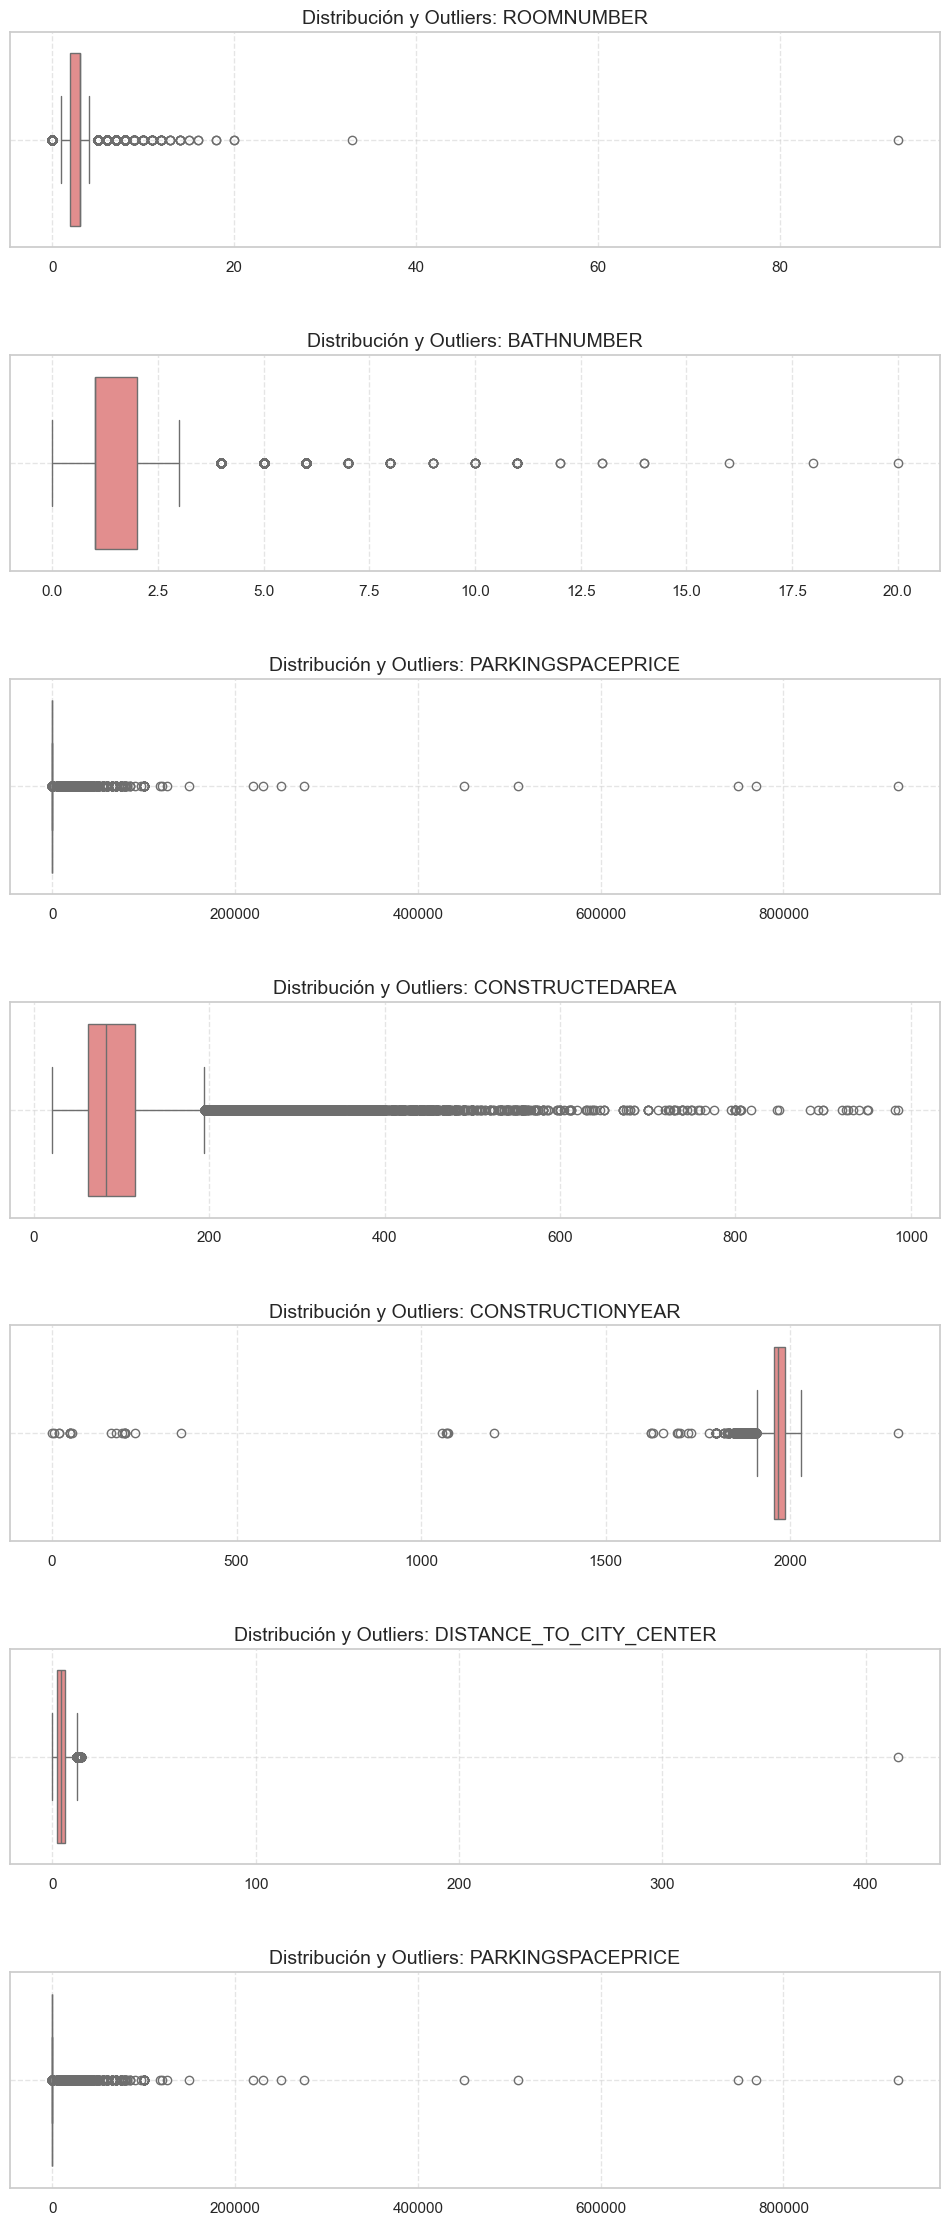

In [35]:
# Análisis de outliers y IQR de todas las variables identificadas previamente
# Lista de variables a analizar
vars_analizar = [
    'ROOMNUMBER',
    'BATHNUMBER',
    'PARKINGSPACEPRICE', 
    'CONSTRUCTEDAREA', 
    'CONSTRUCTIONYEAR', 
    'DISTANCE_TO_CITY_CENTER',
    'PARKINGSPACEPRICE'
]

# Configuración de la figura (5 filas, 1 columna)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 28))
fig.subplots_adjust(hspace=0.5)

print("--- ANÁLISIS DE OUTLIERS (CRITERIO IQR) ---")

for i, col in enumerate(vars_analizar):
    # Cálculo de IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_sup = Q3 + 1.5 * IQR
    limite_inf = Q1 - 1.5 * IQR
    
    # Conteo de outliers
    num_outliers = len(df[(df[col] < limite_inf) | (df[col] > limite_sup)])
    
    print(f"{col}: Límite Superior {limite_sup:.2f} | Máximo Real: {df[col].max()} | Outliers: {num_outliers}")
    
    # Gráfico
    sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Distribución y Outliers: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.show()

##### ROOMNUMBER
Observando los datos y por el conocimiento del mercado inmobiliario, vamos a eliminar los registros con mas de 5 habitaciones porque el objetivo de estudio son inmuebles de inversión y no grandes mansiones 

In [36]:
df = df.loc[df.ROOMNUMBER <= 5]

##### BATHNUMBER
Vamos a hacer lo mismo con la variable sobre el número de baños, limitándola a 4 baños

In [37]:
df = df.loc[df.BATHNUMBER <= 4]

##### PARKINGSPACEPRICE

La variable sobre el precio del parking no está bien identificada como podemos observar, que hay 72695 inmuebles cuyo precio del parking es de 1€. Podríamos entender que los valores inferiores a 100€ podrían ser alquileres de plaza de parking pero, como no tenemos mas datos sobre el dataset, vamos a eliminar la variable y a trabajar con la variable HASPARKINGSPACE que no tiene nulos y nos dice si tiene o no parking la propiedad

In [38]:
df.loc[df.PARKINGSPACEPRICE < 100].PARKINGSPACEPRICE.value_counts().sort_index()

PARKINGSPACEPRICE
1     72695
2         7
6         2
7         1
11        2
16        1
17        1
26        3
41        4
51        3
61        2
71        1
76        2
81        3
91        2
96        2
Name: count, dtype: int64

In [39]:
df.HASPARKINGSPACE.value_counts()

HASPARKINGSPACE
0    58388
1    15883
Name: count, dtype: int64

In [40]:
df.drop(columns='PARKINGSPACEPRICE', inplace=True)

##### CONSTRUCTEDAREA

Vamos a limitar también el rango de metros cuadrados a 400m2

In [41]:
df.CONSTRUCTEDAREA.value_counts().sort_index(ascending=False)

CONSTRUCTEDAREA
985      1
950      1
928      1
926      1
922      1
      ... 
25     195
24      63
23      43
22      49
21      50
Name: count, Length: 476, dtype: int64

In [42]:
df = df.loc[df.CONSTRUCTEDAREA <= 400]


##### CONSTRUCTIONYEAR

El dataset trata de precios de inmuebles de 2018, pero tenemos 2 registros con valores muy superiores. Vamos a conservar los datos con valores 2019 y 2020 por si fueran inmuebles en construcción porque podrían ser datos válidos de cara a proyectar futuras inversiones y vamos a eliminar los 2 registros con valores superiores porque nos generarían ruido en el análisis

In [43]:
df.loc[df.CONSTRUCTIONYEAR > 2020]

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,CONSTRUCTION_PERIOD,FLOORCLEAN_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A7594993370594236105,9,665000.00,3911.76,170,3,3,1,1,1,3,1,1,1,1,0,0,1,1,1,1,1,1,0,1,2028,10,1.00,2014,9,87,3.00,0,0,1,11.29,2.58,5.47,-3.62,40.50,1,<1800,1
A569770063753666613,6,277000.00,4616.67,60,2,1,0,1,1,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2291,0,1.00,1964,4,10,3.00,0,0,1,3.59,0.25,1.89,-3.67,40.43,1,<1800,1


In [44]:
df = df.loc[df.CONSTRUCTIONYEAR <= 2020]


##### DISTANCE_TO_CITY_CENTER

Eliminamos los inmuebles con distancia superior a 15km de radio porque quedarían fuera de la zona de estudio

In [45]:
df.loc[df.DISTANCE_TO_CITY_CENTER > 15]

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,CONSTRUCTION_PERIOD,FLOORCLEAN_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A7501251371917084834,6,191000.00,1317.24,145,4,2,0,1,1,2,1,1,0,0,0,0,1,1,0,1,1,0,0,0,2002,7,1.00,2002,1,1,4.00,0,0,1,415.75,399.48,412.80,-2.75,36.76,1,2000-2019,1


In [46]:
df = df.loc[df.DISTANCE_TO_CITY_CENTER <= 15]

##### CADDWELLINGCOUNT

Eliminamos los conjuntos de viviendas de mas de 800 viviendas para evitar ruido ya que es un solo caso que no nos aportaría gran información

In [47]:
df.loc[df.CADDWELLINGCOUNT > 800].sort_values('CADDWELLINGCOUNT', ascending=False)


,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,CONSTRUCTION_PERIOD,FLOORCLEAN_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A5001174636850707674,12,344000.00,2177.22,158,4,3,1,1,0,3,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1995,2,1.00,1983,5,1499,5.00,0,1,0,8.53,0.20,8.31,-3.79,40.38,0,1980-1999,1


In [48]:
df = df.loc[df.CADDWELLINGCOUNT <= 800]

## **Estadísticos Descriptivos:**

### Análisis Estadístico Descriptivo, Sesgo y conclusiones sobre el dataset
Finalmente nos quedamos con un dataset limitado a inmuebles con variedad de precios hasta los 3.5millones con dimensiones y servicios de todo tipo pero podrían entrar como posibilidades de inversión dependiendo del capital disponible

#### Interpretación de Media vs Mediana (Sesgo)

El análisis de la relación entre la media y la mediana (percentil 50%) nos permite identificar el sesgo de las distribuciones:

* **Variable PRICE (Precio):** Podemos observar sesgo positivo (media > mediana), que se ve en la distribución de los valores que tienden a los precios altos aun después de haber eliminado los precios superiores a 3.5M€
* **Variable CONSTRUCTEDAREA:** Muestra un sesgo positivo moderado (Media 94.6 m² vs Mediana 80 m²). La mayoría de las viviendas se concentran en tamaños estándar, con una minoría de propiedades de gran tamaño que elevan el promedio.
* **Variables de Ubicación (Distancias):** Tras la limpieza, las distancias al centro, metro y Castellana muestran rangos coherentes (máx 15 km). El ligero sesgo positivo indica una mayor densidad de anuncios en el núcleo urbano.
* **Variable ROOMNUMBER:** Presenta una distribución realista (Media 2.49 vs Mediana 3.0). El máximo de 5 habitaciones asegura que el modelo no se vea afectado por errores de carga previos (como el valor de 93 habitaciones).


**Preparación para Modelado:** Al haber eliminado los valores imposibles (como distancias de 400 km o años de construcción futuros), el dataset es ahora robusto para aplicar algoritmos de Machine Learning, minimizando el riesgo de sobreajuste por valores atípicos.



In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MES_2018,74056.00,8.36,3.62,3.00,6.00,9.00,12.00,12.00
PRICE,74056.00,358726.45,326366.21,21000.00,156000.00,251000.00,438000.00,3566000.00
UNITPRICE,74056.00,3611.52,1699.38,805.31,2187.50,3410.00,4700.00,9994.29
CONSTRUCTEDAREA,74056.00,94.64,51.37,21.00,61.00,80.00,112.00,400.00
ROOMNUMBER,74056.00,2.49,1.06,0.00,2.00,3.00,3.00,5.00
BATHNUMBER,74056.00,1.51,0.70,0.00,1.00,1.00,2.00,4.00
HASTERRACE,74056.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
HASLIFT,74056.00,0.68,0.46,0.00,0.00,1.00,1.00,1.00
HASAIRCONDITIONING,74056.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
AMENITYID,74056.00,2.93,0.31,1.00,3.00,3.00,3.00,3.00


## **Visualización de Distribuciones:**

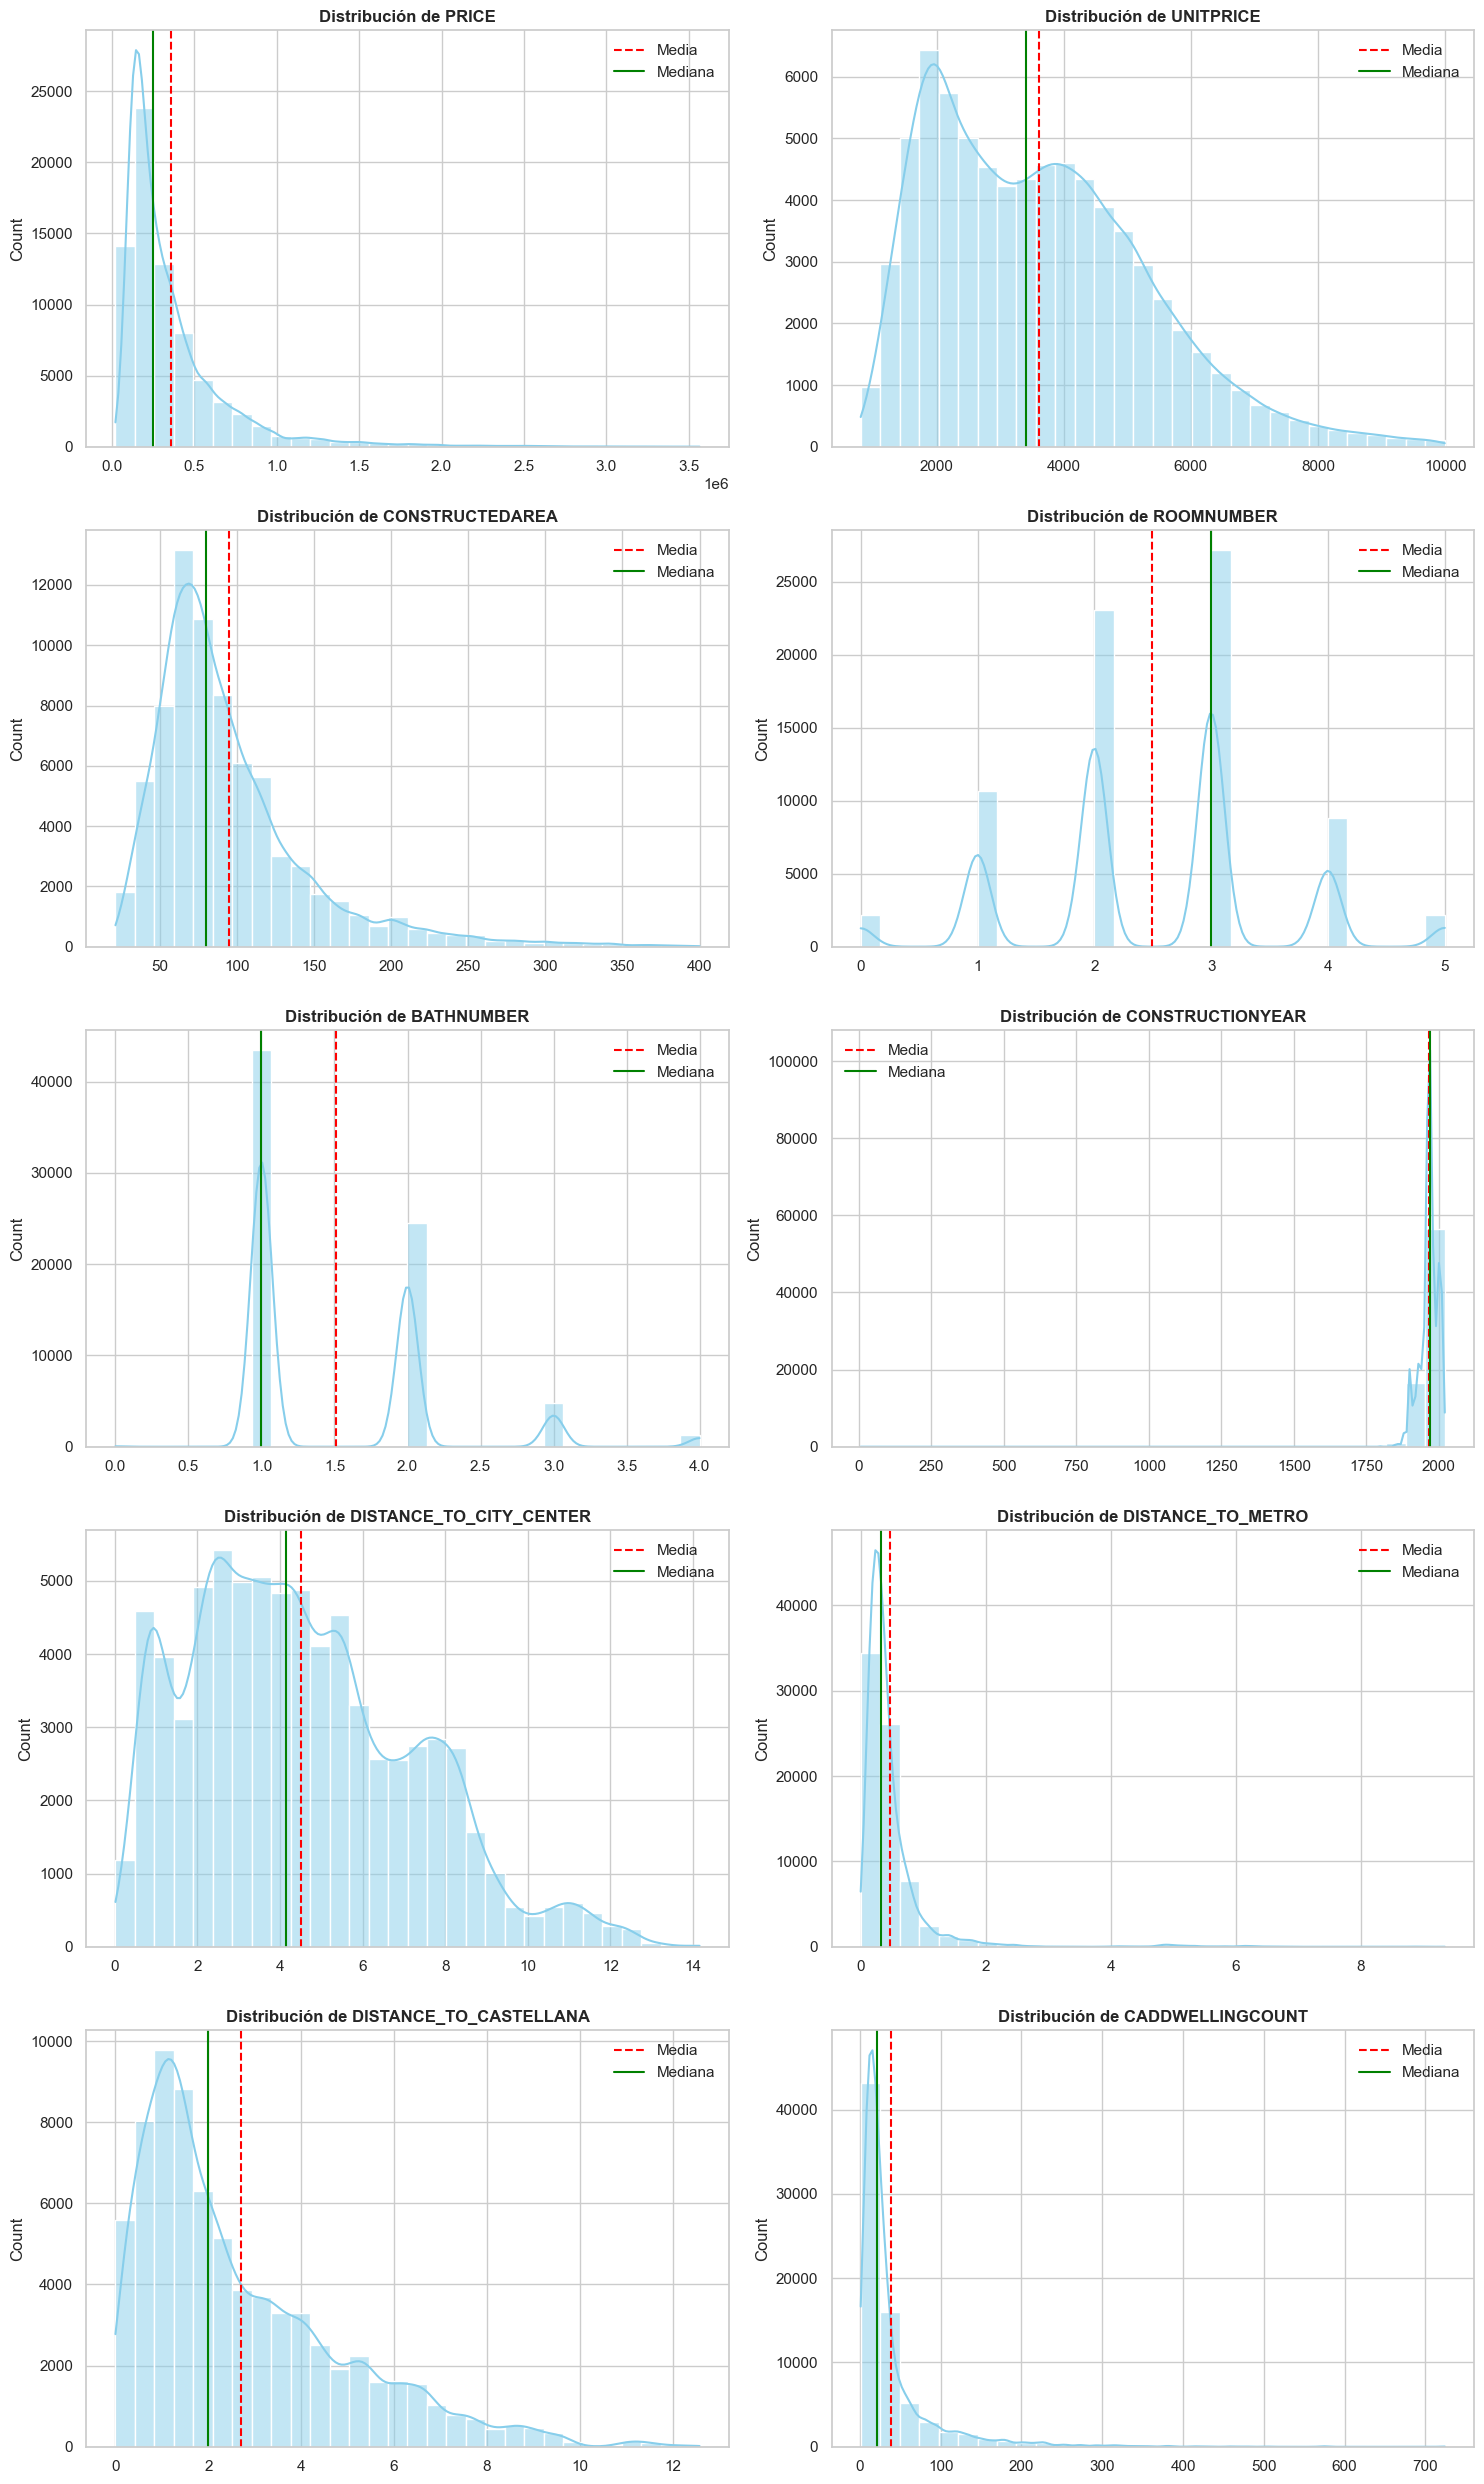

In [50]:
# 1. Lista de variables numéricas no binarias
vars_histogramas = [
    'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 
    'ROOMNUMBER', 'BATHNUMBER', 'CONSTRUCTIONYEAR', 
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 
    'DISTANCE_TO_CASTELLANA', 'CADDWELLINGCOUNT'
]

# 2. Configuración de la malla (5 filas, 2 columnas)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flat # Aplanamos para iterar fácilmente

for i, col in enumerate(vars_histogramas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', bins=30)
    
    # Añadimos líneas para Media (roja) y Mediana (verde) para ver el sesgo
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Media')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Mediana')
    
    axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].legend()

# Ajustar diseño para que no se solapen
plt.tight_layout()
plt.show()

## **Ampliación del análisis:**

- **Análisis de valores nulos:** Explicado en el apartado de NULOS 

- **Comparación entre variables numéricas**

- **Asimetría y curtosis**  

- **Outliers: impacto potencial:** Explicado en el apartado de OUTLIERS 

- **Calidad global del dataset:** Explicado en el apartado CONCLUSIÓN

#### **Comparación de Escalas y Rangos entre Variables Numéricas**

Para este análisis se han seleccionado las variables **PRICE** (Precio) y **CONSTRUCTEDAREA** (Superficie Construida), ya que representan los dos factores de mayor peso en el mercado inmobiliario pero operan en dimensiones numéricas radicalmente opuestas.

| Variable | Media | Desviación Estándar (std) | Mínimo | Máximo |
| :--- | :--- | :--- | :--- | :--- |
| **PRICE** | 358,726.45 | 326,366.21 | 21,000 | 3,566,000 |
| **CONSTRUCTEDAREA** | 94.64 | 51.37 | 21.00 | 400.00 |


#### Análisis de Disparidad

1. **Magnitud Numérica:** El valor máximo del precio es casi 9,000 veces superior al valor máximo de la superficie.

2. **Variabilidad:** La desviación estándar de `PRICE` es inmensamente superior, lo que indica que los datos están muy dispersos en comparación con `CONSTRUCTEDAREA`.

#### **Asimetría y curtosis** 

In [51]:
# Cálculo de Asimetría y Curtosis para CONSTRUCTEDAREA
asimetria = df['CONSTRUCTEDAREA'].skew()
curtosis = df['CONSTRUCTEDAREA'].kurt()

print(f"Variable: CONSTRUCTEDAREA")
print(f"Asimetría (Skewness): {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")

Variable: CONSTRUCTEDAREA
Asimetría (Skewness): 1.90
Curtosis: 4.99


Análisis de Forma: Asimetría y Curtosis de CONSTRUCTEDAREA

Para profundizar en la naturaleza de la variable **CONSTRUCTEDAREA**, hemos calculado sus momentos estadísticos de tercer y cuarto orden.

#### 1. Asimetría (Skewness)
* **Resultado:** 1.90
* **Interpretación:** Al ser un valor positivo, la distribución presenta una asimetría positiva (o a la derecha).
* **Histograma:** La mayor parte de las viviendas se concentran en la parte baja/media de la escala (entre 60 y 110 m²), mientras que la "cola" de la distribución se extiende hacia la derecha debido a la existencia de propiedades de gran tamaño (hasta 400 m²). La media es arrastrada por estos valores altos, situándose a la derecha de la mediana.

#### 2. Curtosis
* **Resultado:** 4.99
* **Interpretación:** Un valor superior a 3 indica una distribución más puntiaguda que una distribución normal con colas largas hacia la derecha.
* **Histograma:** Alta concentración de viviendas en un rango muy específico de metros cuadrados, pero también una presencia significativa de outliers.

#### Conclusión para el Modelado
La combinación de una asimetría positiva y una curtosis elevada sugiere que la variable no sigue una distribución normal perfecta. Para mejorar el rendimiento de algoritmos lineales, se podría considerar una transformación logarítmica para "normalizar" la campana y reducir el impacto de la cola derecha.

## **Conclusión:**

Comenzamos el proceso de calidad y limpieza técnica con un dataset que mostraba variables con una baja calidad por la presencia de multitud de nulos, outliers, variables sin sentido y otras que mostraban valores fuera del rango de posibilidades (CONSTRUCTIONYEAR > 2020) pero, tras la calidad de datos, el dataset ha alcanzado un estado de madurez suficiente para el modelado predictivo, logrando una buena integridad estructural (Eliminación de distancias de 400 km). 

La salud estadística del conjunto de datos ha mejorado drásticamente mediante la gestión de valores atípicos en variables críticas como PRICE y CONSTRUCTEDAREA, logrando una distancia lógica entre media y mediana que reduce el sesgo. 

Podría destacar la ingeniería de variables realizada en el factor temporal y la correcta detección de disparidades de escala, lo que garantiza que el modelo final operará sobre señales reales de mercado y no sobre ruido estadístico, permitiendo una generalización robusta y fiable para la valoración inmobiliaria en Madrid

Una vez realizada todas las modificaciones, consideramos necesarios los siguientes puntos importantes antes de realizar la modelización:
- Eliminación de las siguientes variables:
    - UNITPRICE: Nuestra target será PRICE y UNITPRICE es una columna calculada como PRICE/AREA por lo que provocaría un sobre ajuste en el modelo 
    - PARKINGSPACEPRICE (ya esta eliminada)
    - Todas las que tengan que ver con el año de construccion porque ya tenemos CONSTRUCTIONYEAR_PERIOD
        - CONSTRUCTIONYEAR
        - CONSTRUCTIONYEAR_IMPUT
        - CADCONSTRUCTIONYEAR
    - HASPARKINGSPACE se solapa 100% con ISPARKINGSPACEINCLUDEDINPRICE por lo que entendemos que todos los inmuebles que HASPARKINGSPACE = 1, el precio está incluido en el precio indicado. Esto lo hemos visto en el EDA del punto de las Relaciones Bivariantes pero lo incluimos aquí para realizar una conclusión completa

- Un proceso de transformación de variables como el reescalado de variables para asegurar que el modelado sea preciso y nos permita realizar predicciones representativas sin que las escalas de los valores generen una tendencia errónea en los datos. Sería:

    - Las variables binarias no habria que hacer nada con ellas
    - Categorización Ordinal_encoding a la variable CONSTRUCTION_PERIOD, a la que ya le hicimos una discretizacion. Haremos OE en vez de OHE para darle escala a la variable, ya que entendemos que es mejor una inmueble de nueva construcción que uno de 1950 
    -  Proceso de normalizacion de todas las variables ya que vamos a hacer regresiones y la normalidad está dentro de sus hipotesis sobre los datos. Haremos Yeo-Johnson ya que mantiene mejor la relacion entre las variables sin encorsetar los datos como hace Min-Max Scaling
    - La variable de la fecha, como todos los datos eran 2018, se ha eliminado el año y hemos dejado solamente los meses que aparecen, que son 3, 6, 9 y 12 por lo que no haria nada en este momento, hasta el reescalado
    - No hay variables texto porque ya está hecho una categorizacion de 0/1 en las variables que se pueden referir a los amenities de los inmuebles

- Una vez hechos esas transformaciones, habría que hacer un reescalado y creo que lo mejor sería una estandarizacion porque creo que es la que mejor se adapta a las hipótesis de las regresiones y, los algoritmos modernos están preparados para tratar con datos con magnitudes mezcladas en las escalas que van a quedar las variables binarias y no binarias de este dataset

- Por último antes de modelar, seria necesario realizar una preseleccion de variables. Lo voy a realizar con un método propio creado a partir de la combinación de los métodos de Mutual Information, Recursive Feature Elimination y Permutation Importance aprovechando las mejores características de cada uno.

## **Análisis de Correlación:**

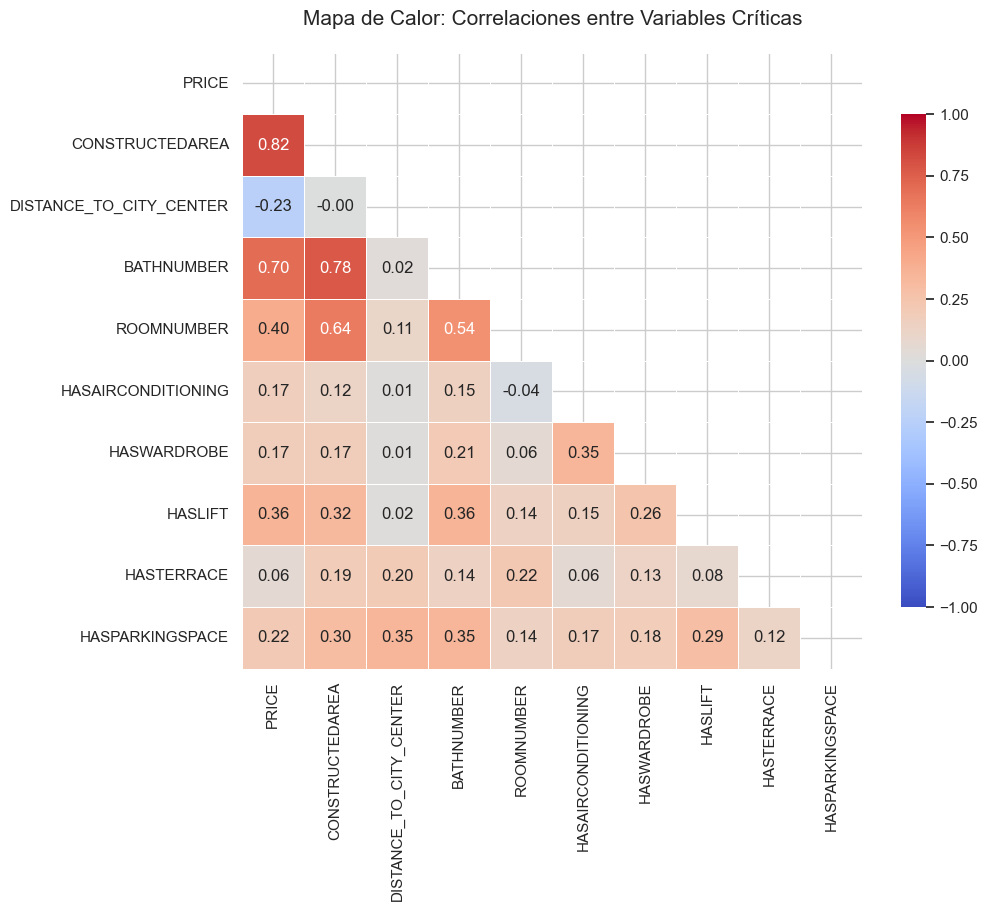

In [52]:
# 1. Usamos las siguientes variables clave
variables_clave = variables_clave = [
    'PRICE',
    'CONSTRUCTEDAREA',
    'DISTANCE_TO_CITY_CENTER',
    'BATHNUMBER',
    'ROOMNUMBER',
    'HASAIRCONDITIONING',
    'HASWARDROBE',
    'HASLIFT',
    'HASTERRACE',
    'HASPARKINGSPACE']

# 2. Calculamos la matriz de correlación solo para esas variables
corr_subset = df[variables_clave].corr()

# 3. Configuramos el gráfico
plt.figure(figsize=(10, 8))

# Creamos una máscara para tapar la mitad superior (opcional, pero queda más limpio)
mask = np.triu(np.ones_like(corr_subset, dtype=bool))

# 4. Dibujamos el heatmap
sns.heatmap(
    corr_subset, 
    mask=mask,
    annot=True,           # Muestra los números dentro de los cuadros
    fmt=".2f",            # Dos decimales
    cmap='coolwarm',      # Azul (negativo) a Rojo (positivo)
    vmin=-1, vmax=1,      # Escala fija de la correlación de Pearson
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Mapa de Calor: Correlaciones entre Variables Críticas', fontsize=15, pad=20)
plt.show()

In [53]:
df

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,CONSTRUCTION_PERIOD,FLOORCLEAN_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A15019136831406238029,3,126000.00,2680.85,47,1,1,0,1,1,3,0,0,0,0,0,0,1,1,1,1,1,0,0,0,2005,1,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36,1,2000-2019,1
A6677225905472065344,3,235000.00,4351.85,54,1,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1978,1,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42,0,1960-1979,1
A13341979748618524775,3,373000.00,4973.33,75,2,1,0,0,1,3,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1985,3,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42,0,1980-1999,1
A4775182175615276542,3,284000.00,5916.67,48,1,1,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1952,1,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42,0,1940-1959,1
A2492087730711701973,3,228000.00,4560.00,50,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1930,0,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41,1,1920-1939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A571333680340351890,12,152000.00,2000.00,76,3,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1972,2,3.00,1972,4,9,6.00,0,0,1,8.58,0.84,6.90,-3.61,40.44,1,1960-1979,1
A8743337170237196617,12,242000.00,2200.00,110,4,2,0,1,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1987,1,1.00,1987,7,22,5.00,0,0,1,8.59,0.71,6.95,-3.61,40.44,1,1980-1999,1
A17390996892963923855,12,107000.00,4280.00,25,1,1,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1930,0,3.00,1930,6,33,4.00,0,0,1,3.03,0.29,1.03,-3.70,40.44,1,1920-1939,1


## **Relaciones Bivariantes:** 

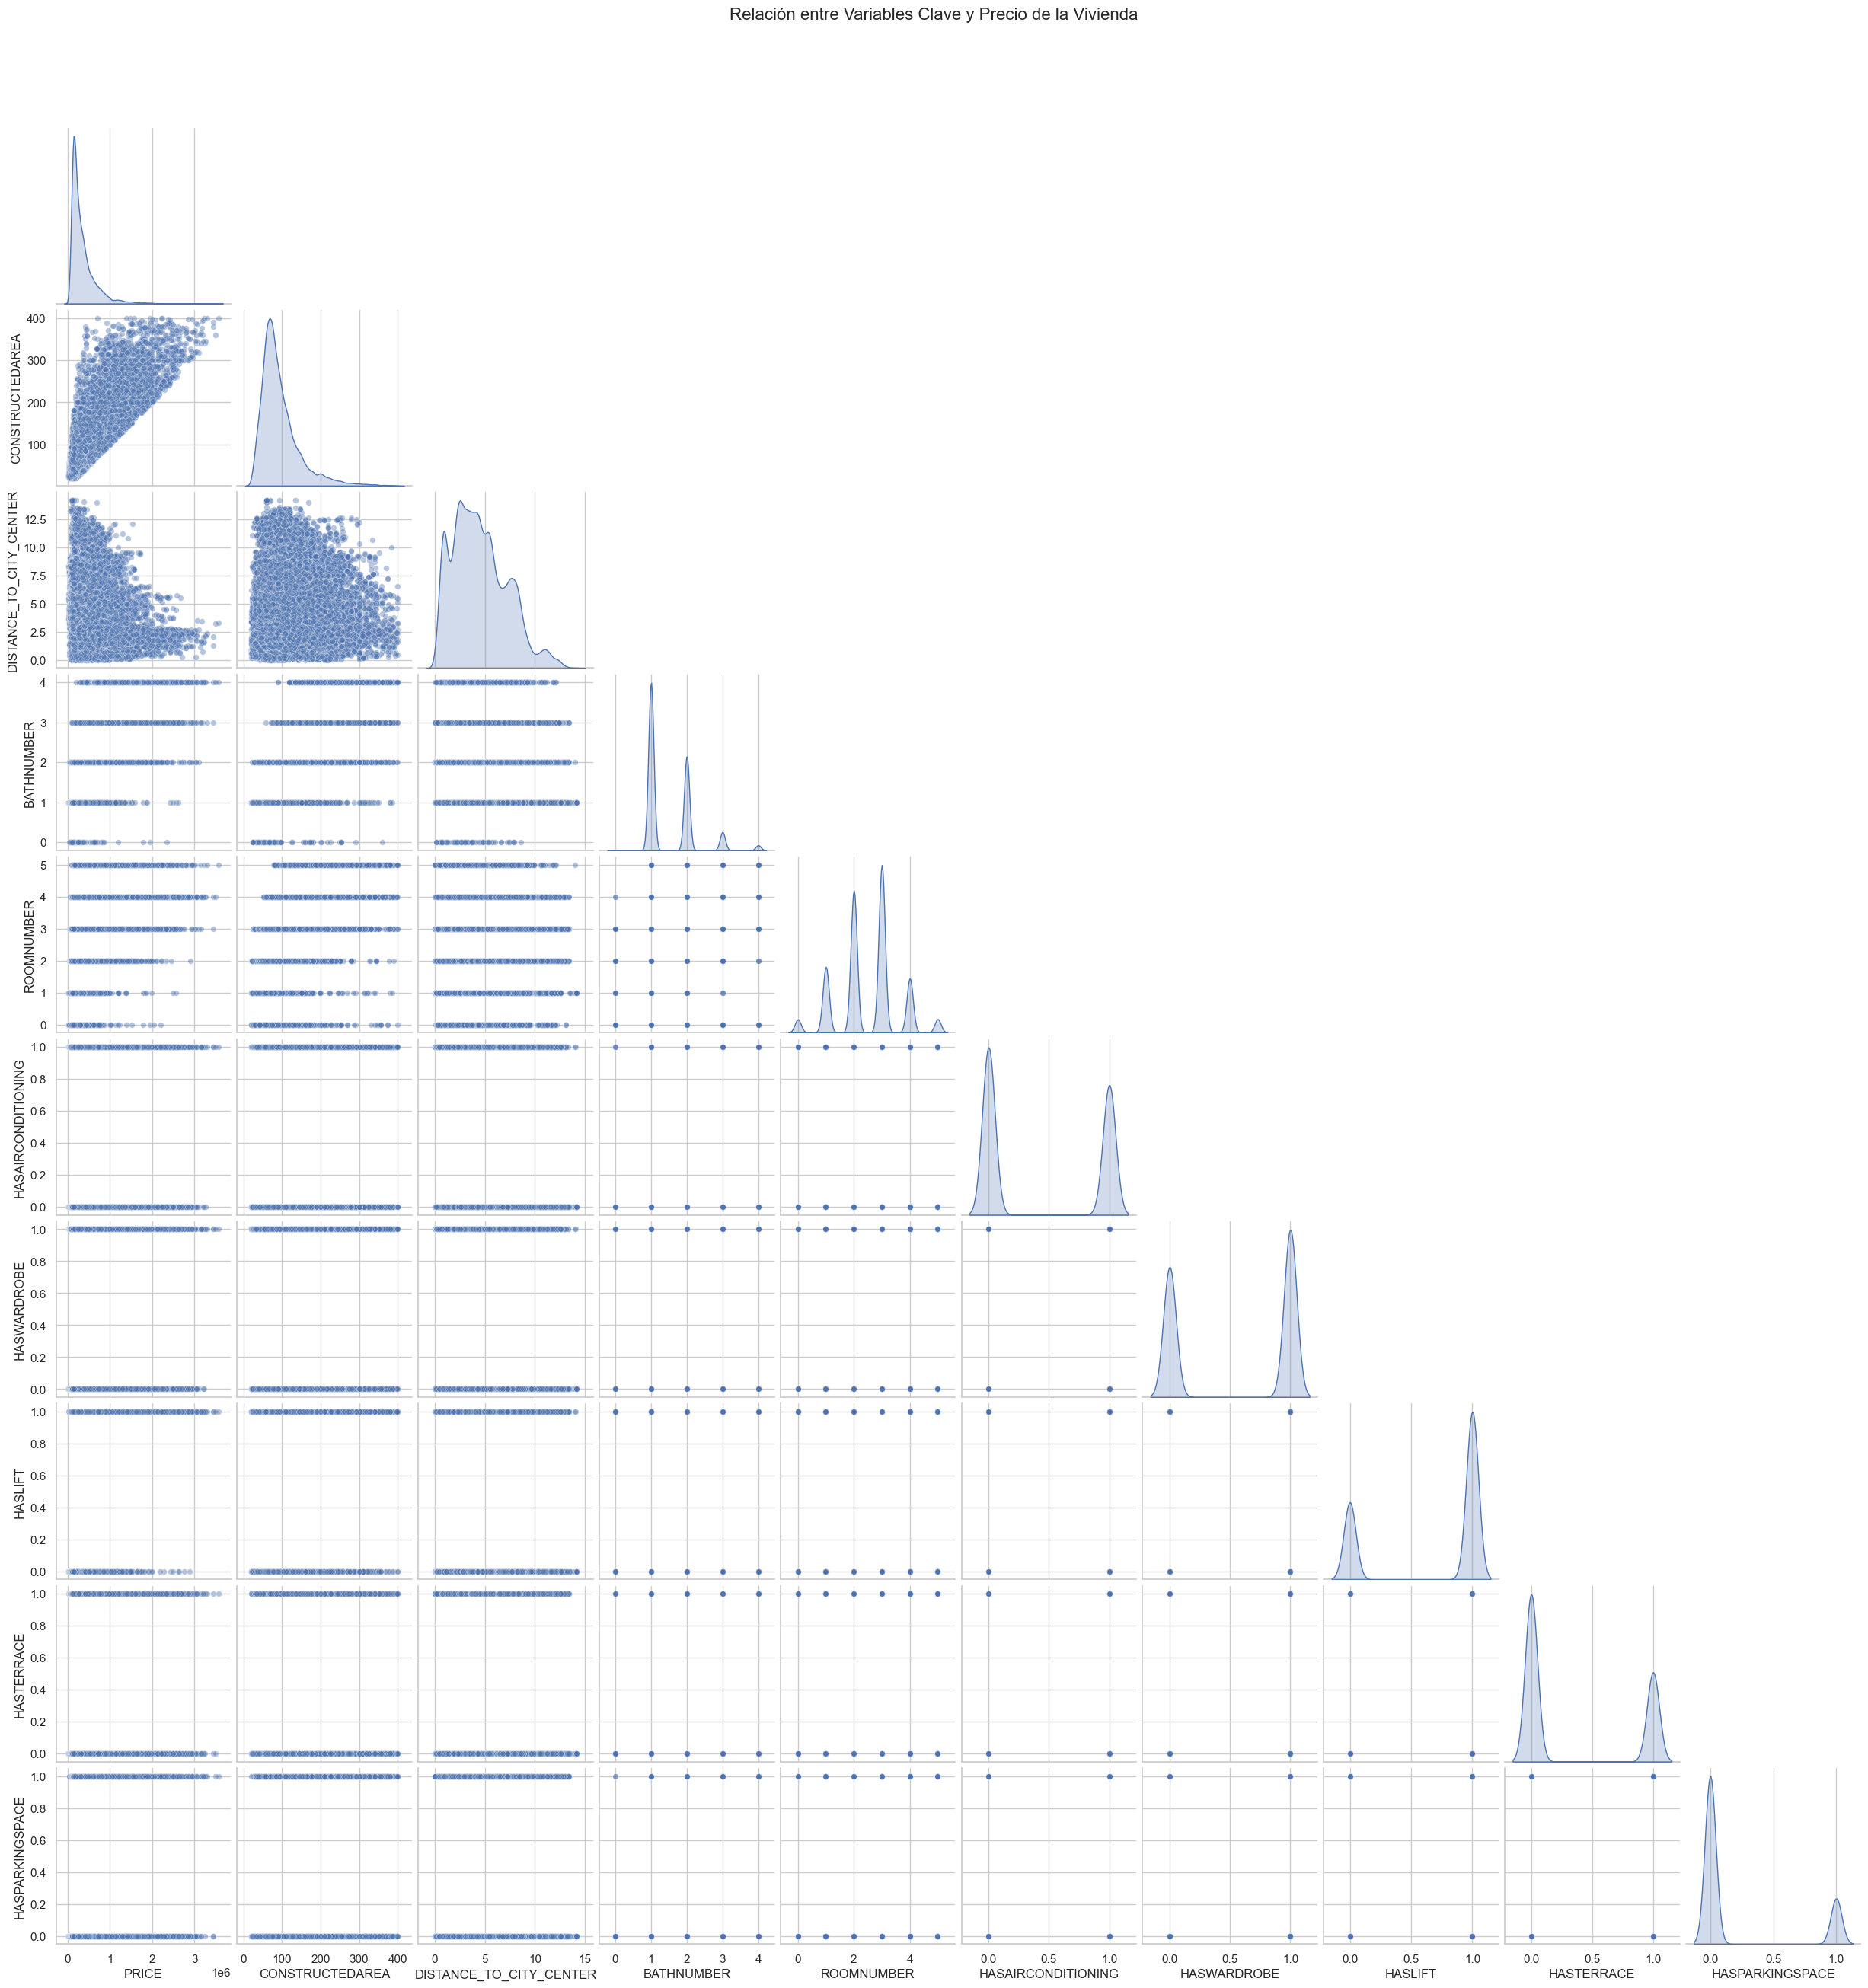

In [54]:
# 1. Definimos la lista de variables basada en el análisis de correlación
variables_clave = [
    'PRICE',
    'CONSTRUCTEDAREA',
    'DISTANCE_TO_CITY_CENTER',
    'BATHNUMBER',
    'ROOMNUMBER',
    'HASAIRCONDITIONING',
    'HASWARDROBE',
    'HASLIFT',
    'HASTERRACE',
    'HASPARKINGSPACE']

# 2. Creamos un sub-dataframe solo con esas columnas y eliminamos nulos para el gráfico
df_grafico = df[variables_clave].dropna()

# 3. Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# 4. Creamos el pairplot
# height=2.5 controla el tamaño de cada subgráfico
# corner=True evita mostrar la mitad superior duplicada
# plot_kws ayuda a que los puntos no se amontonen (transparencia y tamaño)
g = sns.pairplot(
    df_grafico, 
    kind='scatter', 
    diag_kind='kde', 
    corner=True,
    plot_kws={'alpha': 0.4, 's': 30, 'edgecolor': 'w'},
    diag_kws={'fill': True}
)

# 5. Añadimos un título general
g.fig.suptitle('Relación entre Variables Clave y Precio de la Vivienda', fontsize=16, y=1.05)

plt.show()

**Conclusiones del Análisis Exploratorio de Datos (EDA)**

**Variables Predictoras Clave**
* **Determinantes de Precio:** CONSTRUCTEDAREA (0.82) y BATHNUMBER (0.70) presentan la correlación más fuerte y lineal con la target.
* **Impacto Geográfico:** DISTANCE_TO_CITY_CENTER muestra una relación no lineal; el precio cae drásticamente conforme aumenta la distancia al centro de Madrid.
* **Amenities Binarios:** HASLIFT y HASAIRCONDITIONING son las variables de presencia/ausencia con mayor varianza y capacidad de segmentación. El precio varía bastante dependiendo de estas variables

**Estructura y Calidad de los Datos**
* **Asimetría (Skewness):** Las variables de precio y superficie presentan colas largas a la derecha, requiriendo transformaciones (Log o Yeo-Johnson) para normalizar su distribución.
* **Heterocedasticidad:** Se observa un "efecto abanico" en los scatter plots por la varianza del precio que aumenta en propiedades de mayor tamaño.
* **Multicolinealidad:** Existe una redundancia crítica entre CONSTRUCTEDAREA y BATHNUMBER pero entendemos que no se debe borrar ninguna de las dos variables porque son variables críticas en análisis inmobiliario


## **Transformaciones y Preselección de variables:** 

El proceso que vamos a seguir es el siguiente:
- Extraer la target de df
- Eliminación de variables innecesarias
- Vamos a generar 3 listas de variables: Categóricas, binarias, no binarias
- Haremos el Ordinal Encoding y lo guardaremos en un dataframe llamado cat_oe con la variable que tenga el sufijo '_oe' (CONSTRUCTION_PERIOD_oe)
- Normalizaremos las variables numéricas no binarias y lo guardaremos en un dataframe llamado num_yeo con la variable que tenga el sufijo '_yeo'
- Reescalado Standard Scaler
- Uniremos los datesets específicos eliminando los nulos generados
- Preseleccion de variable con SUPERRANKING



#### **Generación de la target:**

In [55]:
target = df['PRICE']
target

ASSETID
A15019136831406238029   126000.00
A6677225905472065344    235000.00
A13341979748618524775   373000.00
A4775182175615276542    284000.00
A2492087730711701973    228000.00
                           ...   
A571333680340351890     152000.00
A8743337170237196617    242000.00
A17390996892963923855   107000.00
A594657524104116520     145000.00
A2983474039508057158    261000.00
Name: PRICE, Length: 74056, dtype: float64

#### **Eliminación de variables:**

In [56]:
variables_desechadas = ['UNITPRICE','CONSTRUCTIONYEAR','CONSTRUCTIONYEAR_IMPUT','CADCONSTRUCTIONYEAR','HASPARKINGSPACE','PRICE']

df = df.drop(columns=variables_desechadas)

#### **Generación de los datasets de Categóricas, Binarias, No Binarias:**

In [57]:
# Dataframe variables categóricas
cat = df.select_dtypes('object')

# Dataframe variables binarias
variables_binarias = [col for col in df.columns if df[col].nunique() == 2]
bin = df[variables_binarias]

# Dataframe variables no binarias
descartar = [bin, cat]
df_descartar = pd.concat(descartar, axis = 1)

no_bin = df.drop(columns=df_descartar)

#### **Categorización Ordinal Encoding:**

In [58]:
# Seleccionamos las variables a aplicar Ordinal Encoding
var_oe = ['CONSTRUCTION_PERIOD']

#Hacemos una lista con el orden jerárquico de la variable de menos a mas
categorias_construction_period = ['<1800', 
                                '1800-1819', 
                                '1820-1839', 
                                '1840-1859', 
                                '1860-1879', 
                                '1880-1899', 
                                '1900-1919', 
                                '1920-1939', 
                                '1940-1959', 
                                '1960-1979', 
                                '1980-1999', 
                                '2000-2019']

# Instanciamos
oe = OrdinalEncoder(categories = [categorias_construction_period])

# Entrenamos y aplicamos
cat_oe = oe.fit_transform(cat[var_oe])

# Añadir sufijos a los nombres
nombres_oe = [variable + '_oe' for variable in var_oe]

# Guardar como dataframe
cat_oe = pd.DataFrame(cat_oe, columns = nombres_oe, index = cat.index)
cat_oe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74056 entries, A15019136831406238029 to A2983474039508057158
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CONSTRUCTION_PERIOD_oe  74056 non-null  float64
dtypes: float64(1)
memory usage: 3.1+ MB


#### **Normalización Yeo-Johnson:**

In [59]:
# Seleccionamos las variables a aplicar Yeo-Johnson
var_yeo = ['MES_2018',
            'CONSTRUCTEDAREA',
            'ROOMNUMBER',
            'BATHNUMBER',
            'AMENITYID',
            'FLOORCLEAN',
            'FLATLOCATIONID',
            'CADMAXBUILDINGFLOOR',
            'CADDWELLINGCOUNT',
            'CADASTRALQUALITYID',
            'DISTANCE_TO_CITY_CENTER',
            'DISTANCE_TO_METRO',
            'DISTANCE_TO_CASTELLANA',
            'LONGITUDE',
            'LATITUDE']

# Instanciamos
yeo = PowerTransformer(method = 'yeo-johnson')

# Entrenamos y aplicamos
num_yeo = yeo.fit_transform(no_bin[var_yeo])

#Añadir sufijos a los nombres
nombres_yeo = [variable + '_yeo' for variable in var_yeo]

#Guardar como dataframe
num_yeo = pd.DataFrame(num_yeo,columns = nombres_yeo, index = no_bin.index)

#### **Reescalado Standard Scaler:**

In [60]:
# Seleccionamos las columnas/variables que necesitan reescalado componiendo un dataset específico que contenga las variables no binarias y las categóricas En este caso:
variables_ss = [num_yeo, cat_oe]
df_ss = pd.concat(variables_ss, axis = 1)

# Cargamos el modelo StandardScaler
from sklearn.preprocessing import StandardScaler

# Instanciamos
ss = StandardScaler()

# Entrenamos
ss.fit(df_ss)

# Aplicamos
salida = ss.transform(df_ss)

# Pasamos la salida a un dataframe con los nombres de las columnas de df_ss
df_ss = pd.DataFrame(salida, columns = df_ss.columns, index = num_yeo.index)

#Extraemos un describe para observar los valores resultantes
df_ss.describe().T


,count,mean,std,min,25%,50%,75%,max
MES_2018_yeo,74056.00,0.00,1.00,-1.45,-0.69,0.14,1.02,1.02
CONSTRUCTEDAREA_yeo,74056.00,-0.00,1.00,-3.22,-0.65,-0.06,0.63,2.91
ROOMNUMBER_yeo,74056.00,0.00,1.00,-2.34,-0.46,0.48,0.48,2.37
BATHNUMBER_yeo,74056.00,-0.00,1.00,-8.29,-0.79,-0.79,0.98,2.06
AMENITYID_yeo,74056.00,-0.00,1.00,-4.00,0.25,0.25,0.25,0.25
FLOORCLEAN_yeo,74056.00,-0.00,1.00,-2.97,-0.74,-0.15,0.71,2.57
FLATLOCATIONID_yeo,74056.00,-0.00,1.00,-0.50,-0.50,-0.50,-0.50,2.04
CADMAXBUILDINGFLOOR_yeo,74056.00,-0.00,1.00,-5.22,-0.39,0.04,0.74,3.86
CADDWELLINGCOUNT_yeo,74056.00,0.00,1.00,-3.06,-0.65,-0.06,0.59,3.07
CADASTRALQUALITYID_yeo,74055.00,-0.00,1.00,-3.29,-0.63,0.06,0.76,2.88


#### **Unificado de todos los datasets parciales:**

In [61]:
unir = [df_ss, #Incluye los datasets de categóricas y variables no binarias
        bin,
        target]
df_tablon = pd.concat(unir, axis = 1)
df_tablon

,MES_2018_yeo,CONSTRUCTEDAREA_yeo,ROOMNUMBER_yeo,BATHNUMBER_yeo,AMENITYID_yeo,FLOORCLEAN_yeo,FLATLOCATIONID_yeo,CADMAXBUILDINGFLOOR_yeo,CADDWELLINGCOUNT_yeo,CADASTRALQUALITYID_yeo,DISTANCE_TO_CITY_CENTER_yeo,DISTANCE_TO_METRO_yeo,DISTANCE_TO_CASTELLANA_yeo,LONGITUDE_yeo,LATITUDE_yeo,CONSTRUCTION_PERIOD_oe,HASTERRACE,HASLIFT,HASAIRCONDITIONING,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,FLOORCLEAN_IMPUT,PRICE
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A15019136831406238029,-1.45,-1.24,-1.41,-0.79,0.25,-0.74,-0.50,0.41,2.44,-1.31,1.26,1.40,1.56,-2.29,-1.73,1.41,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,1,126000.00
A6677225905472065344,-1.45,-0.92,-1.41,-0.79,0.25,-0.74,1.99,-0.39,-0.74,-1.31,-1.63,-1.43,-0.34,-0.60,0.07,0.07,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,235000.00
A13341979748618524775,-1.45,-0.20,-0.46,-0.79,0.25,0.31,-0.50,0.04,0.16,-1.31,-1.61,-1.24,-0.30,-0.63,0.06,0.74,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,373000.00
A4775182175615276542,-1.45,-1.19,-1.41,-0.79,0.25,-0.74,1.99,1.04,-0.41,0.06,-1.65,-1.20,-0.36,-0.59,0.06,-0.60,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,284000.00
A2492087730711701973,-1.45,-1.10,-2.34,-0.79,0.25,-1.57,-0.50,-0.39,-0.17,1.46,-1.38,-0.02,-0.17,-0.70,-0.34,-1.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,228000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A571333680340351890,1.02,-0.17,0.48,0.98,0.25,-0.15,2.04,-0.89,-0.96,0.76,1.39,1.36,1.56,1.87,0.62,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,152000.00
A8743337170237196617,1.02,0.60,1.42,0.98,-4.00,-0.74,-0.50,0.41,-0.01,0.06,1.40,1.12,1.57,1.89,0.57,0.74,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,242000.00
A17390996892963923855,1.02,-2.77,-1.41,-0.79,0.25,-1.57,2.04,0.04,0.40,-0.63,-0.44,-0.26,-0.76,-0.41,0.70,-1.27,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,107000.00


In [62]:
# Localizamos que hay un solo registro con un valor nulo por lo que vamos a eliminarlo directamente
df_tablon.isna().sum().sort_values(ascending=False)

CADASTRALQUALITYID_yeo           1
CONSTRUCTEDAREA_yeo              0
ROOMNUMBER_yeo                   0
BATHNUMBER_yeo                   0
MES_2018_yeo                     0
AMENITYID_yeo                    0
FLOORCLEAN_yeo                   0
CADMAXBUILDINGFLOOR_yeo          0
FLATLOCATIONID_yeo               0
CADDWELLINGCOUNT_yeo             0
DISTANCE_TO_CITY_CENTER_yeo      0
DISTANCE_TO_METRO_yeo            0
DISTANCE_TO_CASTELLANA_yeo       0
LONGITUDE_yeo                    0
LATITUDE_yeo                     0
CONSTRUCTION_PERIOD_oe           0
HASTERRACE                       0
HASLIFT                          0
HASAIRCONDITIONING               0
ISPARKINGSPACEINCLUDEDINPRICE    0
HASNORTHORIENTATION              0
HASSOUTHORIENTATION              0
HASEASTORIENTATION               0
HASWESTORIENTATION               0
HASBOXROOM                       0
HASWARDROBE                      0
HASSWIMMINGPOOL                  0
HASDOORMAN                       0
HASGARDEN           

In [63]:
df_tablon = df_tablon.loc[~df_tablon.CADASTRALQUALITYID_yeo.isnull()]

#### **Preseleccion de variables con SUPERRANKING:**


In [67]:
# PASO 0. Identificar variables discretas (binarias y ordinales ya codificadas)
# Creamos una lista booleana donde True indica que la variable es discreta
is_discrete = [col in variables_binarias or col.endswith('_oe') for col in x.columns]

# PASO 1. Preparar x e y
target = 'PRICE'
x = df_tablon.drop(columns = target).copy()
y = df_tablon[target].copy()

# PASO 2. MÉTODOS PRESELECCIÓN

# Método 1. MUTUAL INFORMATION (Ajustado para Regresión y Discretas)
def ranking_mi(mutual_selector, modo = 'tabla'):
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

# LÍNEA CLAVE: Uso del parámetro discrete_features
mutual_selector = mutual_info_regression(x, y, discrete_features = is_discrete, random_state = 42)
x_mi = ranking_mi(mutual_selector)

# Método 2. RECURSIVE FEATURE ELIMINATION
rfe = RFE(estimator = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42))
rfe.fit(x,y)
x_rfe = pd.DataFrame({'variable': x.columns, 'ranking_rfe': rfe.ranking_}).sort_values(by = 'ranking_rfe')

# Método 3. PERMUTATION IMPORTANCE
gbr = GradientBoostingRegressor(random_state=42) # Corregido: parámetros de clasificación eliminados
gbr.fit(x,y)
permutacion = permutation_importance(gbr, x, y, scoring = 'r2', n_repeats=10, n_jobs=-1, random_state=42)

def ranking_per(predictoras, permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)
x_per = ranking_per(x, permutacion)

# PASO 3. SUPER RANKING
def ranking_tot(x_mi, x_rfe, x_per):
    ranking_tot = pd.merge(pd.merge(x_mi, x_rfe), x_per)
    ranking_tot['puntos'] = ranking_tot.ranking_mi + ranking_tot.ranking_rfe + ranking_tot.ranking_per
    ranking_tot.sort_values(by = 'puntos', inplace=True)
    ranking_tot['ranking_tot'] = range(0,len(ranking_tot.variable))
    return(ranking_tot)

super_ranking = ranking_tot(x_mi, x_rfe, x_per)

# Selección final de variables
x_sr = x[super_ranking.variable[0:40]].copy()

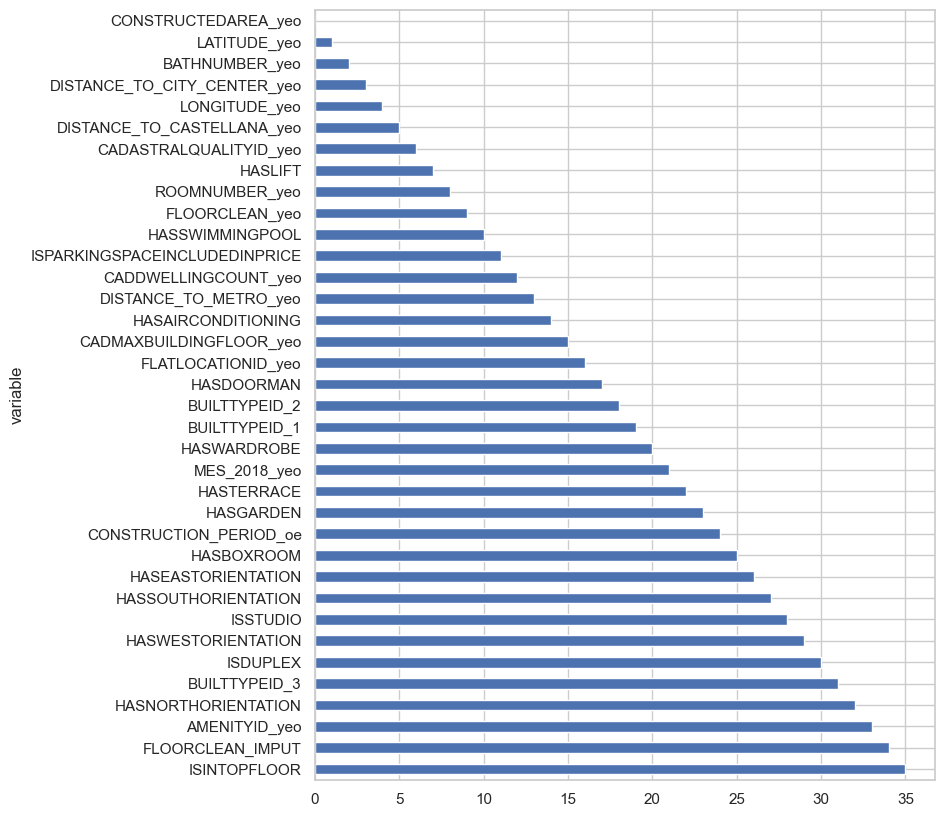

In [68]:
# Gráfico de todas las variables según el ranking_tot. 
# En el gráfico NO muestra la importancia de la variable si no la posición descendiente desde la variable mas importante a la menos importante
super_ranking.set_index('variable').ranking_tot[0:40].sort_values(ascending = False).plot.barh(figsize = (8,10));

In [69]:
# Seleccionamos las 20 variables mas importantes según SuperRanking
top20 = super_ranking.variable[0:21].values
x_preseleccionado = x[top20].copy()
x_preseleccionado

,CONSTRUCTEDAREA_yeo,LATITUDE_yeo,BATHNUMBER_yeo,DISTANCE_TO_CITY_CENTER_yeo,LONGITUDE_yeo,DISTANCE_TO_CASTELLANA_yeo,CADASTRALQUALITYID_yeo,HASLIFT,ROOMNUMBER_yeo,FLOORCLEAN_yeo,HASSWIMMINGPOOL,ISPARKINGSPACEINCLUDEDINPRICE,CADDWELLINGCOUNT_yeo,DISTANCE_TO_METRO_yeo,HASAIRCONDITIONING,CADMAXBUILDINGFLOOR_yeo,FLATLOCATIONID_yeo,HASDOORMAN,BUILTTYPEID_2,BUILTTYPEID_1,HASWARDROBE
ASSETID,,,,,,,,,,,,,,,,,,,,,
A15019136831406238029,-1.24,-1.73,-0.79,1.26,-2.29,1.56,-1.31,1,-1.41,-0.74,1,0,2.44,1.40,1,0.41,-0.50,1,1,0,1
A6677225905472065344,-0.92,0.07,-0.79,-1.63,-0.60,-0.34,-1.31,0,-1.41,-0.74,0,0,-0.74,-1.43,0,-0.39,1.99,0,0,0,1
A13341979748618524775,-0.20,0.06,-0.79,-1.61,-0.63,-0.30,-1.31,0,-0.46,0.31,0,0,0.16,-1.24,1,0.04,-0.50,0,0,0,1
A4775182175615276542,-1.19,0.06,-0.79,-1.65,-0.59,-0.36,0.06,1,-1.41,-0.74,0,0,-0.41,-1.20,1,1.04,1.99,0,0,0,0
A2492087730711701973,-1.10,-0.34,-0.79,-1.38,-0.70,-0.17,1.46,0,-2.34,-1.57,0,0,-0.17,-0.02,0,-0.39,-0.50,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A571333680340351890,-0.17,0.62,0.98,1.39,1.87,1.56,0.76,0,0.48,-0.15,0,0,-0.96,1.36,0,-0.89,2.04,0,0,0,0
A8743337170237196617,0.60,0.57,0.98,1.40,1.89,1.57,0.06,1,1.42,-0.74,0,0,-0.01,1.12,1,0.41,-0.50,0,0,0,1
A17390996892963923855,-2.77,0.70,-0.79,-0.44,-0.41,-0.76,-0.63,1,-1.41,-1.57,0,0,0.40,-0.26,0,0.04,2.04,0,0,0,0


# PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
4.  **Regresión logistica:**

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------

## **Regresión Lineal (Scikit-Learn):**
- Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
- Realiza un Train/Test Split (80/20).
- Entrena un modelo de Regresión Lineal.
- Evalúa el modelo usando R² y RMSE.

### Modelización:

In [70]:
# 1. Preparamos los datasets: x e y
target = 'PRICE'
y = df_tablon[target]
x = x_preseleccionado

# 2. Dividimos los datasets en 4 objetos y le ponemos Validación al grupo de Test
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2)

# 3. Instanciamos el modelo y el objeto de validación cruzada para comprobar la estabilidad del modelo sobre el grupo de Train
rm = LinearRegression()
kf = KFold(n_splits = 5)

# 4. Entrenamos los modelos y evaluamos
metricas_cv_rm = cross_val_score(estimator = rm,
                                 X = train_x,
                                 y = train_y,
                                 cv = kf,
                                 scoring = 'neg_mean_absolute_error')
print('Métricas RM Train: ', metricas_cv_rm)             #Comprobamos que los resultados de la validación son estables
print('Media métricas RM Train: ', metricas_cv_rm.mean())#o iteramos haciendo cambios en las variables

# 5. Modelizamos sobre train con el modelo
train_rm_fit = rm.fit(train_x,np.ravel(train_y))#El ravel es para pasarlo en formato plano y que no salga warning

# 6. Modelizamos y predecimos sobre validación con el modelo
val_rm_sco = rm.predict(val_x.values)

# Extraemos la métrica de medicición del error sobre el grupo de validación
print('Métricas RM Validación: ', mean_absolute_error(val_y, val_rm_sco))#Regresión Múltiple da 4.9 por lo que predice mejor

# Métricas añadidas
mae = mean_absolute_error(val_y, val_rm_sco)
rmse = np.sqrt(mean_squared_error(val_y, val_rm_sco))
r2 = r2_score(val_y, val_rm_sco)

print('--- Resultados en Validación ---')
print('MAE:  ', mae)   # Error medio en euros
print('RMSE: ', rmse)  # Error cuadrático medio (castiga errores grandes)
print('R2:   ', r2)    # % de varianza explicada (0 a 1)

Métricas RM Train:  [-116240.20390222 -116747.05315433 -116265.81716542 -118993.65186474
 -117150.49272371]
Media métricas RM Train:  -117079.44376208463
Métricas RM Validación:  116904.05674945678
--- Resultados en Validación ---
MAE:   116904.05674945678
RMSE:  183444.5072799193
R2:    0.6852405695803176


- MAE (117.433€): Representa el error medio absoluto, indicando que el modelo se desvía, en promedio, unos 117.433€ por cada tasación realizada.
- RMSE (186.692€): Es el error cuadrático medio, que penaliza con mayor fuerza los fallos grandes en viviendas con precios extremos (outliers).
- R² (0.678): Indica que el modelo es capaz de explicar el 67.8% de la variabilidad de los precios en Madrid con las variables actuales.

### Visualización:

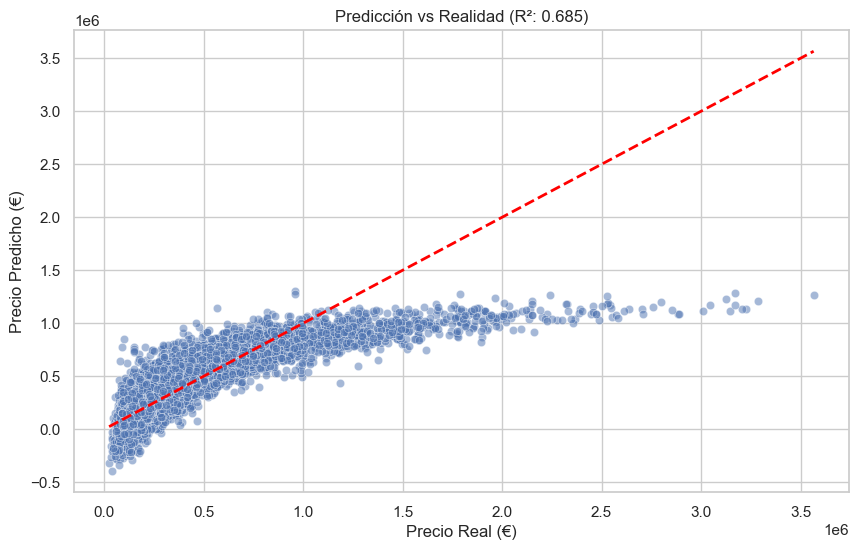

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Gráfico de puntos
sns.scatterplot(x=val_y, y=val_rm_sco, alpha=0.5)

# Línea de referencia (lo que sería una predicción perfecta)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='red', lw=2, linestyle='--')

plt.title(f'Predicción vs Realidad (R²: {r2:.3f})')
plt.xlabel('Precio Real (€)')
plt.ylabel('Precio Predicho (€)')
plt.grid(True)
plt.show()

### Análisis de Resultados:

Diagnóstico del Gráfico "Predicción vs. Realidad"
- Saturación (Techo): El modelo lineal no es capaz de predecir valores por encima de 1.2M€ aproximadamente, aunque existan casas de 3M€. Se queda "plano" porque la relación precio-características en el lujo no es una línea recta.
- Incoherencia: Tienes predicciones negativas (por debajo de 0€), lo cual es físicamente imposible en este mercado.
- Heterocedasticidad: El error crece a medida que aumenta el precio, lo que indica que el modelo pierde mucha precisión en las viviendas más caras.

Conclusión y Recomendación
- La Regresión Lineal ha llegado a su límite. No es un problema de tus variables (que están bien seleccionadas), sino de la capacidad del algoritmo para entender patrones complejos.
- El siguiente paso lógico es: Entrenar un Random Forest Regressor o un XGBoost. Estos modelos están basados en árboles y son mas adecuados para relaciones no lineales
- No tiene sentido que haga una Regresión Logística porque los resultados no van a mejorar, por lo que voy a hacer un approach de predicción con los algoritmos mencionados de cara a mejorar las métricas de medición del error con objetivo de hacer un modelo que permita realizar una predicción que sea usableen un contexto real

## **Modelización con Optimización de Modelos (RandomizedSearchCV):**

### Modelización:

In [72]:
# 1. Preparamos los datasets: x e y
target = 'PRICE'
y = df_tablon[target]
x = x_preseleccionado

# 2. Dividimos los datasets en 4 objetos y le ponemos Validación al grupo de Test
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2)

# 3. Crear el pipe y el diccionario de algorimos, parámetros y valores a testar
pipe = Pipeline([('algoritmo',RandomForestRegressor())])

grid = [{'algoritmo': [RandomForestRegressor()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]},
        
        {'algoritmo': [XGBRegressor()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
        
        {'algoritmo': [HistGradientBoostingRegressor()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__scoring': ['neg_mean_absolute_percentage_error'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

# 4. Random Search
# Optimizar los hiper parámetros: Podríamos cambiar el numero de iteraciones (n_iter) y la métrica para que nos de el scoring por si consiguieramos mejores resultados
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 25, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_percentage_error', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(train_x,train_y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score').head()
#Debemos mirar el valor de la columna mean_test_score para compararlo con AUC que nos salga sobre val_y

# 5. Predecir sobre el grupo de Validación
pred = modelo.best_estimator_.predict(val_x)

# 6. Evaluar sobre el grupo de Validación
mape = mean_absolute_percentage_error(val_y, pred)
print('Mean Absolute Percentaje Error: ', mape)

# 7. Examinar el mejor modelo 
modelo.best_estimator_

Mean Absolute Percentaje Error:  0.1301467882928636


,steps,"[('algoritmo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


### Visualización:

Representación de las predicciones según el modelo realizado con XGBoost donde podemos observar que llega a predicciones de precios de inmuebles de lujo, a diferencia de el gráfico de Regresión Lineal que observabamos un techo de 1.2M€ a partir del cual no realizaba predicciones

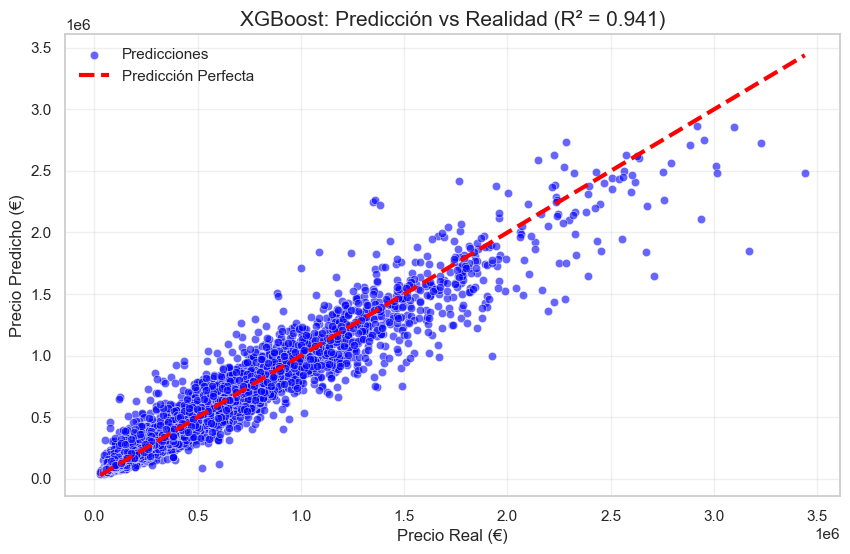

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=val_y, y=pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='red', lw=3, ls='--', label='Predicción Perfecta')

plt.title(f'XGBoost: Predicción vs Realidad (R² = {r2_final:.3f})', fontsize=15)
plt.xlabel('Precio Real (€)', fontsize=12)
plt.ylabel('Precio Predicho (€)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

En este gráfico podemos observar cuales son las variables mas influyentes para la predicción de las 21 variables preseleccionadas, donde concluímos que en el mercado inmobiliario de Madrid, son mas influyentes los metros cuadrados que la distancia a PDI's como La Castellana

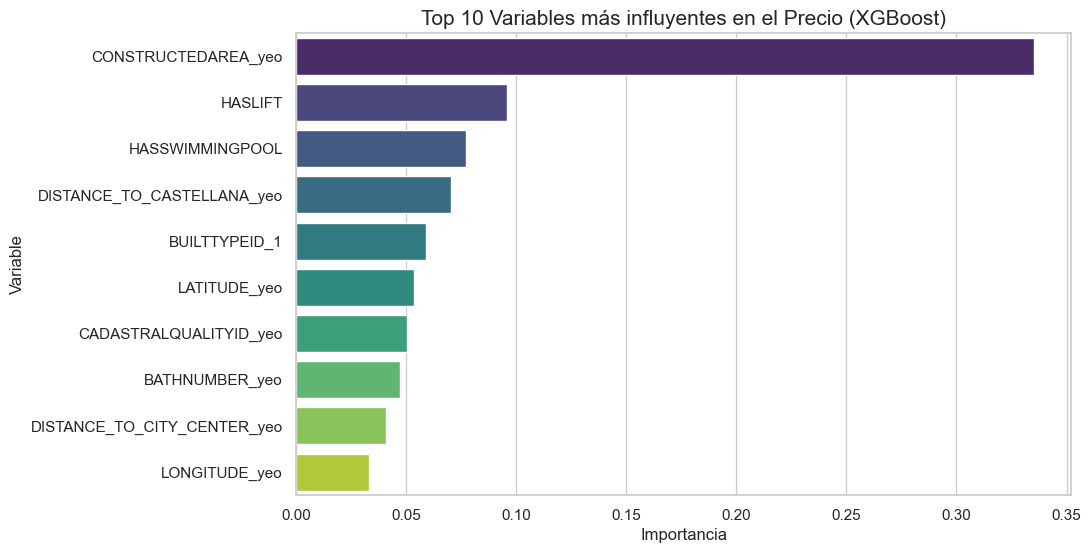

In [76]:
# Extraemos la importancia del modelo ganador dentro del Pipeline
importancias = modelo.best_estimator_.named_steps['algoritmo'].feature_importances_
variables = x_preseleccionado.columns

# Creamos un DataFrame para graficar
df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')
plt.title('Top 10 Variables más influyentes en el Precio (XGBoost)', fontsize=15)
plt.show()

En este gráfico podemos observar la alta precisión del modelo debido a la centralidad de la distribución de los errores cuya campana está centrada en cero

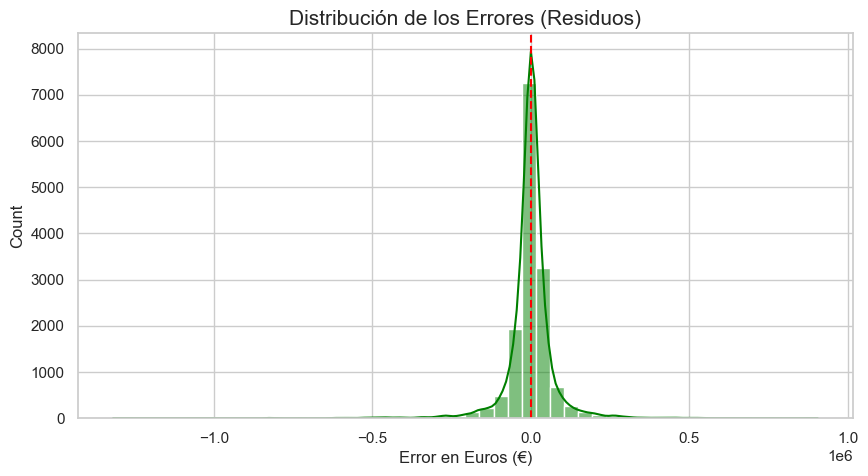

In [77]:
errores = pred - val_y
plt.figure(figsize=(10, 5))
sns.histplot(errores, kde=True, bins=50, color='green')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de los Errores (Residuos)', fontsize=15)
plt.xlabel('Error en Euros (€)')
plt.show()

### Análisis de Resultados:

Tras ejecutar el proceso de búsqueda aleatoria para encontrar el mejor algoritmo y sus hiperparámetros, estos son los hallazgos principales:

#### **XGBoost Regressor**
El sistema ha seleccionado un XGBRegressor como el best_estimator_. Esto confirma que las relaciones no lineales del mercado inmobiliario de Madrid (ubicación, área, servicios) se capturan mucho mejor con un modelo de potenciación de gradiente (Gradient Boosting) que con modelos lineales o árboles simples.

Configuración óptima encontrada:
- n_estimators: 1000 (El modelo utiliza un gran número de árboles para corregir errores residuales).
- max_depth: 10 (Permite capturar interacciones complejas entre variables).
- learning_rate: 0.05 (Un aprendizaje pausado que garantiza estabilidad).
- n_jobs: -1 (Uso de todos los núcleos del procesador para máxima eficiencia).

#### **Métrica: MAPE (Mean Absolute Percentage Error)**
Resultado obtenido: 0.130146... (aprox. **13%**)

- Interpretación: En promedio, las predicciones del modelo se desvían un 13% del precio real de la vivienda.
- Contexto de negocio: Un error del 13% indica que el modelo es capaz de distinguir con precisión entre diferentes rangos de precios, adaptándose tanto a viviendas modestas como a inmuebles de mayor valor.

#### **Comparativa frente a la Regresión Lineal:**
- Localiza inmuebles en todo el rango de precios posibles.
- No predice Precios Negativos.
- Mejor ajuste en el Lujo: El modelo entiende que a partir de ciertos metros cuadrados o en ciertas características, el precio no sube de forma lineal, sino exponencial.

In [ ]:
# Calculamos el R2 sobre el grupo de validación con XGBoost 
r2_final = r2_score(val_y, pred)

print('Mean Absolute Percentage Error (MAPE):', mape)
print('Coeficiente de Determinación (R2):', r2_final)

Mean Absolute Percentage Error (MAPE): 0.1301467882928636
Coeficiente de Determinación (R2): 0.941275230923284


Hemos conseguido pasar de un $R^2$ de 0.67 con la Regresión Lineal a un $R^2$ de 0.94 con XGBoost optimizado.

Esto quiere decir que el modelo es capaz de predecir un 94.1% de la variabilidad de los precios de los inmuebles en Madrid. 

## **Ampliación del análisis:**

- **Diagnóstico del modelo de regresión lineal:** Explicado en la conclusión del modelo de Regresión Lineal

- **Regresión logística: adecuación del modelo:** Un modelo de Regresión Logística no es adecuado para mi proyecto ya que mi target es continua. El objetivo del modelo es predecir el precio de venta de los inmuebles para estimar la rentabilidad que podría tener una inversión.ute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos:** No he realizado el modelo de Regresión Logística, pero si que he realizado una Optimización de Modelos (RandomizedSearchCV) con la que se ha mejorado el $R^2$ de un 0.685 a un 0.941, con mejoras significativas en la representación gráfica y la distribución de los errores. Todo ello explicado en los apartados de análisis de resultados de cada modelo

# PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: [4.10469831]
Pendiente estimada: [2.86583023]


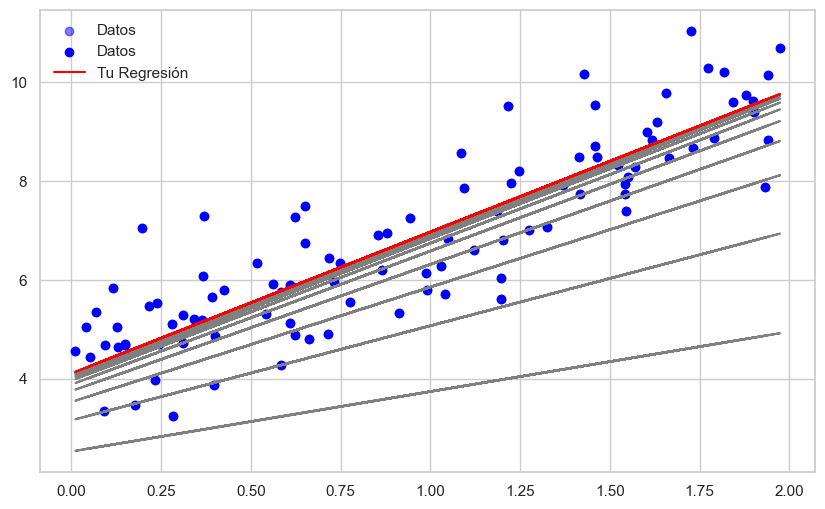

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    m = len(X)
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ
    #Generacion aleatoria de parametros (numpy)
    # Usamos np.random.randn para empezar en un punto cualquiera
    w = np.random.randn(1)
    b = np.random.randn(1)

    # Generamos un gráfico scatter que tendrá puntos azules y que se rellenará con los datos del bucle a continuación
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Datos')

    # Este bucle lo que hace es iterar haciendo una predicción sobre la altura e inclinación de la línea que va a pintar 
    # hasta que llega a una opción óptima que es la que visualizamos de color rojo
    for i in range(1, iteraciones):
        # Calcular la predicción actual (y = wX + b) de dónde cree el modelo que deberían estar los puntos azules
        y_pred = b + w * X

        # Calcular el error restando el valor predicho menos el valor real de los puntos azules.
        error = y_pred - y

        # Ajustar parámetros 
        # dw Le dice a la línea si debe estar más o menos inclinada para fallar menos (pendiente)
        dw = (2/m) * np.sum(error * X)
        # db Le dice a la línea si debe subir o bajar globalmente (intercepto)
        db = (2/m) * np.sum(error)

        w = w - eta * dw
        b = b - eta * db

        # Pintar la recta
        pintar_recta(b, w, X, y)

    return b, w

def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')

# Probemos tu función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

# PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

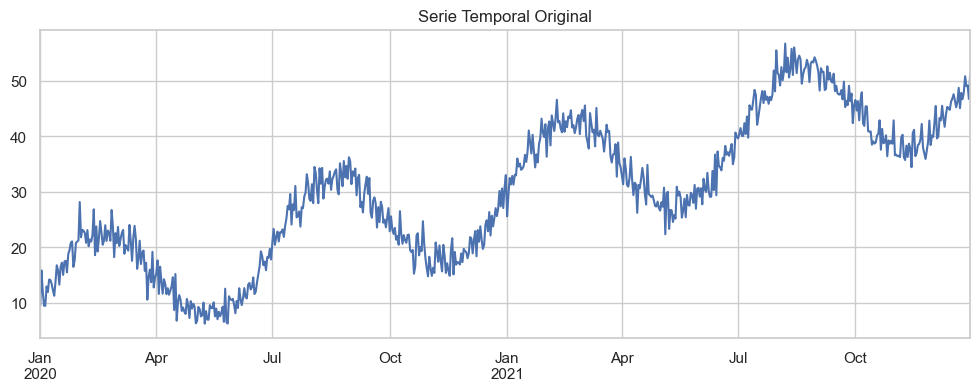

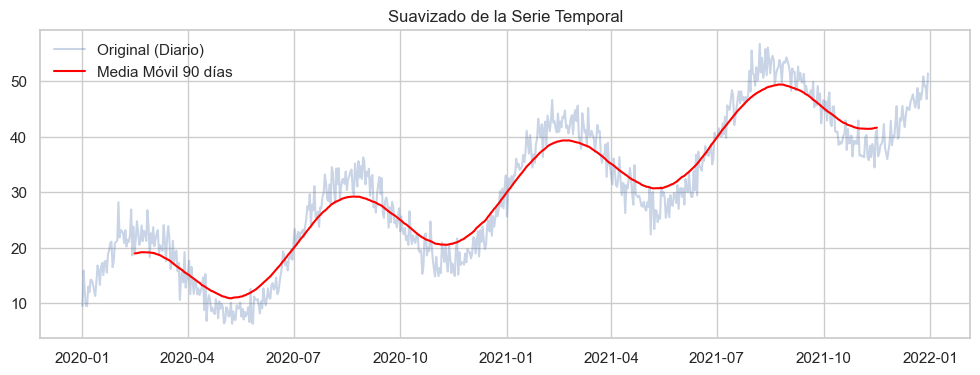

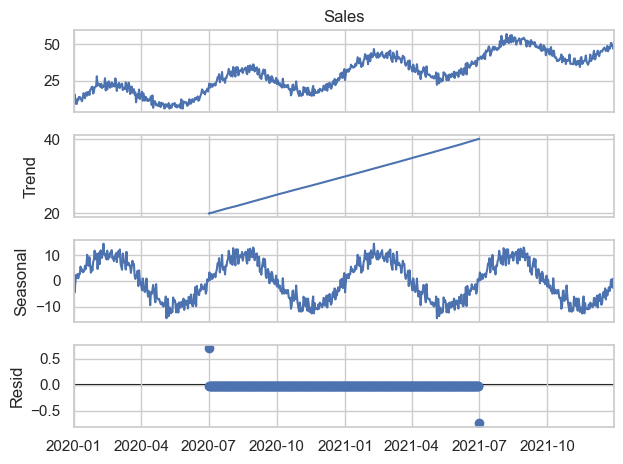

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ
# Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 1.  Convierte el índice a formato DateTime.
ts_df.index = pd.to_datetime(ts_df.index)

# 2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
monthly_sales = ts_df['Sales'].resample('M').mean()

# 3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
ts_df['Moving_Avg'] = ts_df['Sales'].rolling(window=90, center=True).mean()

# Graficamos el suavizado para ver la diferencia
plt.figure(figsize=(12,4))
plt.plot(ts_df['Sales'], alpha=0.3, label='Original (Diario)')
plt.plot(ts_df['Moving_Avg'], color='red', label='Media Móvil 90 días')
plt.title('Suavizado de la Serie Temporal')
plt.legend()
plt.show()

# 4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).
result = seasonal_decompose(ts_df['Sales'], model='additive', period=365)
result.plot()
plt.show()